# $\textbf{Finding red fraction of stars for T tauri stars }$

## In this file, I combined T-Tauri stars from four different T-Tauri stars catalog of Nebulea (Orion Nebula, IC 1396, NGC 2264 and a comibined list of T -Tauri stars)

## Later I checked the Statistical robustness of parameter "Red Fraction" by comparing the red fraction with all three types of stars

In [1]:
# Importing all required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import seaborn as sn
from tqdm import tqdm
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.coordinates import SkyCoord


### $\textbf{Defining a function for downloading all information from GAIA database}$

In [2]:
# Defining a function which will return GAIA's and 2MASS's data of T Tauri sources taking input of source_id of the sources

def get_TTauri_list(s_id):
    """Pass a tuple of source id of sources, it will return all required parameters values from the GAIA DR3, 2MASS"""

    query = """SELECT g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_photogeo, d3.r_lo_photogeo, d3.r_hi_photogeo,(d3.r_hi_photogeo - d3.r_lo_photogeo)/(2 * d3.r_med_photogeo) AS dist_frac, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv, tmass.j_m, tmass.h_m, tmass.ks_m
        FROM gaiadr3.gaia_source as g, gaiadr3.tmass_psc_xsc_best_neighbour as t, gaiadr3.tmass_psc_xsc_join AS tt,  gaiadr1.tmass_original_valid as tmass, external.gaiaedr3_distance AS d3
        WHERE g.source_id IN {}""".format(s_id) + """ AND g.parallax > 0.0 AND
        (g.parallax IS NOT NULL) AND (g.phot_g_mean_mag IS NOT NULL) AND (g.source_id = t.source_id AND t.original_ext_source_id = tt.original_psc_source_id AND  tt.original_psc_source_id = tmass.designation) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()
    result = result.to_pandas()

    return result


### Importing T tauri stars from Orion Nebula

In [3]:
df_orion_ttauri = pd.read_csv("Orion Nebula-TTauri.csv")
name_orion = df_orion_ttauri["SimbadName"]
df_orion_ttauri

,2MASS,CID,SimbadName,_DE,_RA
0,J05333304-0511555,"RZ Ori, Kiso A-0976 45, [FHM2008] S1-ap75",2MASS J05333304-0511555,-5.19875,83.38767
1,J05333443-0514177,[FHM2008] S1-ap78,2MASS J05333443-0514177,-5.23825,83.39346
2,J05333588-0501324,"VY Ori, Kiso A-0976 50, [FHM2008] S2-ap44",2MASS J05333588-0501324,-5.02567,83.39950
3,J05333855-0513125,"Kiso A-0976 51, [FHM2008] F21-ap90",2MASS J05333855-0513125,-5.22014,83.41062
4,J05334167-0524042,"Kiso A-0976 52, [FHM2008] F21-ap63",2MASS J05334167-0524042,-5.40117,83.42362
...,...,...,...,...,...
367,J05364760-0536312,"Kiso A-0976 281, [FHM2008] F22-ap172",2MASS J05364760-0536312,-5.60867,84.19833
368,J05364965-0504094,"V850 Ori, Kiso A-0976 282, [FHM2008] F11-a...",2MASS J05364965-0504094,-5.06928,84.20687
369,J05364980-0537594,NaN,2MASS J05364980-0537594,-5.63317,84.20750
370,J05365186-0508358,"V852 Ori, Kiso A-0976 284, [FHM2008] F22-ap132",2MASS J05365186-0508358,-5.14328,84.21608


### $\textbf{Defining a function for finding the GAIA DR3/2 source id of T Tauri stars}$

In [4]:
def get_source_id_tauri(objects_name, restricted_index):
    """ Make a list of name for all the objects of which you want the source id"""
    """ It will return a tuple of all objects having source_id of Gaia DR2 or DR3 table"""

    source_id = []
    for index, name in tqdm(enumerate(objects_name)):
        if all([index != ind for ind in restricted_index]):
            # if index != 16 and index != 28 and index != 30 and index != 158 and index != 166 and index != 210  and index != 131 and index != 138 and index != 33 and index != 69 and index != 74 and index != 90 and index != 102 and index != 128:

            result_table = Simbad.query_objectids(name)
            lp = np.shape(result_table)

            if lp[0] == 0:
                continue
            else:
                ch = []

                for element in result_table:
                    ll = list(element)
                    mp = "".join(ll)
                    nl = mp.split(" ")
                    ch.append(nl)

                sor_id = []

                for i in range(len(ch)):

                    for j in range(len(ch[i])):

                        if (ch[i][0] == 'Gaia' and ch[i][1] == 'DR3'):
                            sor_id.append(ch[i][-1])

                        elif (ch[i][0] == 'Gaia' and ch[i][1] == 'DR2'):
                            sor_id.append(ch[i][-1])

                sor_id = list(set(sor_id))
                id = int(sor_id[0])
                # print(index, id)
                source_id.append(id)

    source_id = tuple(source_id)
    return source_id


In [5]:
restricted_index = [6, 10, 25, 27, 29, 34, 40, 69, 86, 97,
                    104, 113, 116, 117, 121, 137, 139, 161, 181, 185, 193, 196, 199, 218, 232, 260, 268, 278, 280, 294, 296, 302,
                    317, 327, 331]

source_id_tx = get_source_id_tauri(name_orion, restricted_index)


372it [00:01, 347.68it/s]


In [6]:
orion_ttauri_list = get_TTauri_list(source_id_tx)
orion_ttauri_list

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
0,3017195593225089152,84.082267,-5.806561,2.610325,0.081753,376.957245,364.681671,390.502075,0.034248,16.915049,18.381969,15.595030,2.786940,8.998521,13.110,11.931,11.092
1,3017199755050720384,83.987094,-5.755333,3.977770,0.455604,245.388809,223.798630,272.269440,0.098763,16.285620,17.780148,14.840106,2.940042,9.283818,12.572,11.446,10.823
2,3017200339166252288,84.043074,-5.707523,2.521509,0.036276,387.975739,383.274445,393.808594,0.013576,15.500696,16.809914,14.299551,2.510363,7.508999,11.586,10.158,9.138
3,3017200510964946048,84.030422,-5.706033,2.541496,0.015053,387.473297,385.624054,389.433960,0.004916,13.232972,13.917264,12.405818,1.511446,5.258420,11.273,10.441,9.890
4,3017200545324683520,84.027540,-5.698426,2.538226,0.089371,386.157654,371.513306,399.781952,0.036602,16.628145,17.626947,15.291996,2.334951,8.650797,13.457,12.904,12.614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,3209546356413094528,83.636540,-4.979642,2.796374,0.107893,349.974701,338.625916,360.988190,0.031948,17.182314,19.118898,15.819344,3.299555,9.415290,13.755,13.167,12.893
307,3209546429428840704,83.625992,-4.977181,2.933181,0.099343,333.286346,322.878082,344.799469,0.032887,17.537889,19.571815,16.212612,3.359203,9.874584,14.203,13.570,13.323
308,3209547219702787840,83.769219,-4.974742,2.417702,0.080210,403.153931,392.495331,422.931274,0.037747,16.668701,18.008400,15.382153,2.626247,8.585715,13.478,12.075,11.087
309,3209554366528478848,84.080284,-5.007902,2.403305,0.082246,409.990021,393.295715,425.181335,0.038886,17.342213,19.540813,15.962565,3.578248,9.246257,13.691,13.079,12.774


### $\textbf{Defining a function which will find all the sources surrounding a target sources with some angular search radius}$

In [7]:
# defining a function for extracting data of stars from GAIA database around a choosen Object(Star or Herbig Ae/Be star)

# The function will take input query size, ra, dec of the centered boject and radius of the circle
# It will give output of ojects around that star in table form

def get_surrounding_sources(query_size, ra_obj, dec_obj, radius_deg):

    query = """SELECT TOP {}""".format(query_size) + """
        g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_geo, d3.r_lo_geo, d3.r_hi_geo, (d3.r_hi_geo - d3.r_lo_geo)/(2*d3.r_med_geo) AS fdu_geo, d3.r_med_photogeo, d3.r_lo_photogeo, d3.r_hi_photogeo,
        (d3.r_hi_photogeo - d3.r_lo_photogeo)/(2*d3.r_med_photogeo) AS fdu_photogeo, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv,
        w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro, tmass.j_m, tmass.h_m, tmass.ks_m
        FROM gaiadr3.gaia_source as g, gaiadr3.allwise_best_neighbour as x, gaiadr1.allwise_original_valid as w, gaiadr3.tmass_psc_xsc_best_neighbour as t, gaiadr3.tmass_psc_xsc_join AS tt,  gaiadr1.tmass_original_valid as tmass, external.gaiaedr3_distance AS d3
        WHERE CONTAINS(POINT(g.ra, g.dec), CIRCLE({}""".format(ra_obj) + """, {}""".format(dec_obj)+""", {}""".format(radius_deg) + """ )) = 1 AND g.parallax > 0.0 AND
        g.parallax IS NOT NULL AND g.bp_rp IS NOT NULL AND ((g.source_id = x.source_id AND x.allwise_oid = w.allwise_oid) AND (g.source_id = t.source_id AND t.original_ext_source_id = tt.original_psc_source_id AND  tt.original_psc_source_id = tmass.designation)) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()

    return result


In [8]:
# def get_gaia_result(ra_obj, dec_obj, radius_deg):
    

#     query1 = """SELECT g.ra, g.dec, g.parallax, g.parallax_error, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv,
#         w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro, tmass.j_m, tmass.h_m, tmass.ks_m
#         FROM gaiadr3.gaia_source as g, gaiadr3.allwise_best_neighbour as x, gaiadr1.allwise_original_valid as w, gaiadr3.tmass_psc_xsc_best_neighbour as t, gaiadr3.tmass_psc_xsc_join AS tt,  tmass_original_valid as tmass, external.gaiaedr3_distance AS d3
#         WHERE CONTAINS(POINT(g.ra, g.dec), CIRCLE({}""".format(ra_obj) + """, {}""".format(dec_obj)+""", {}""".format(radius_deg) + """ )) = 1 AND g.parallax > 0.0 AND
#         g.parallax IS NOT NULL AND g.bp_rp IS NOT NULL AND (g.source_id = x.source_id AND x.allwise_oid = w.allwise_oid) AND (g.source_id = t.source_id AND t.original_ext_source_id = tt.original_psc_source_id AND  tt.original_psc_source_id = tmass.designation) AND (g.source_id = d3.source_id)
#         """

#     job2 = Gaia.launch_job(query1)
#     result1 = job2.get_results()

#     return result1

In [9]:
t_tauri_x = get_surrounding_sources(1000, 193.3217131, -77.1196488, 6.0/60.0)


In [10]:
t_tauri_x

source_id,ra,dec,parallax,parallax_error,r_med_geo,r_lo_geo,r_hi_geo,fdu_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,fdu_photogeo,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,w1mpro,w2mpro,w3mpro,w4mpro,j_m,h_m,ks_m
,deg,deg,mas,mas,pc,pc,pc,,pc,pc,pc,,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float32,float64,float32,float32,float32,float64,float32,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32,float32
5788939612278490880,193.48250355499096,-77.21117383515363,0.8629436109902722,0.16091251,1203.1696,1030.1837,1462.951,0.17984469933895508,820.6374,769.9532,884.8639,0.0700130818724102,18.861313,20.353724,17.660349,2.6933746,8.54122495466023,14.058,14.037,12.486,9.103,15.527,14.51,14.046
5788939646638229888,193.3694046873655,-77.2074104185426,0.13429677792169267,0.30000922,3295.7695,2196.7893,5046.024,0.4322563504705962,1478.2644,1306.3702,1664.3759,0.12108984502155337,19.738733,21.012596,18.611115,2.4014816,5.379061257143212,15.309,15.347,12.837,9.158,16.571,15.911,15.392
5788939650933371392,193.39827158252325,-77.20495499175611,1.039711335552647,0.3365851,1338.037,924.9252,2023.3479,0.4104605253494622,1687.7401,1434.3907,1922.1642,0.14450490153780926,19.800732,20.858633,18.672298,2.1863346,9.885295553611385,15.099,15.217,12.935,9.169,16.564,15.892,15.667
5788939680997928448,193.4872851439533,-77.19617102762025,0.5998915657314308,0.09604179,1679.6952,1455.8209,1950.5522,0.14726818474595646,1676.0386,1454.9476,2004.8577,0.1640505304109771,18.01014,19.798021,16.74692,3.0511017,6.9005032450805786,12.685,12.594,12.284,8.937,14.419,13.275,12.843
5788939680997970560,193.44875531315637,-77.19730680658559,0.49684548149476737,0.16799548,2227.7996,1690.0844,3363.3252,0.37553666729241547,2072.195,1339.367,3256.1196,0.4624933035538086,18.886312,20.457138,17.706839,2.7502995,7.367419207400534,14.219,14.275,12.929,9.242,15.623,14.679,14.312
5788939680997971584,193.48390451480753,-77.18639755673739,0.16816672529251553,0.2438521,3578.1677,2287.5996,5502.851,0.44928741639616065,1145.3729,1030.2975,1216.5789,0.08131909181547912,19.374819,20.751505,18.203135,2.5483704,5.5035191381594455,14.278,14.267,12.842,9.123,15.772,14.807,14.389
5788941124106939776,193.59273872158275,-77.19203727927037,1.0139248849383642,0.087730065,949.858,885.13873,1024.8817,0.0735599348509713,857.93567,818.6674,904.88684,0.05024818556192623,17.861822,19.544775,16.595371,2.9494038,7.891851039056036,12.653,12.39,12.819,9.187,14.189,13.243,12.864
5788941128405827200,193.5879052243092,-77.18359873541262,0.711215772358371,0.3152155,2187.8994,1458.5469,3013.4287,0.35533668182907674,1112.3615,939.72906,1265.4608,0.14641452669502708,19.769798,21.132387,18.541267,2.5911198,9.029805175060982,14.754,14.443,12.827,8.82,16.225,15.228,14.881


### $\textbf{Defining the seperation boundary between main sequence stars and red stars}$

$\textbf{Counting the number of red stars sourrounding the Main sources}$

In [11]:
# Defining the equation of straight line for the boundries

# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------


def equation1(y):

    x = 2.5 - 1.0/5.0 * (y - 1)

    return x


def equation2(y):

    x = 1.8 + 1.9/4.0 * (y - 4.5)

    return x


def equation3(y):

    x = 3.7 + 9.0/40.0 * (y - 8.5)

    return x


# --------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------

# Defining a function which will count red object
# just we need to pass list of object(stars) with G-K as X- coordinate and Absolute Magnitude(Mv) as Y-coordinate

def counting_fun(her_mg, her_gk):

    count_red = 0

    for i in range(len(her_mg)):

        if her_mg[i] <= 4.5:
            if her_gk[i] >= equation1(her_mg[i]):
                count_red = count_red + 1

        elif 4.5 < her_mg[i] and her_mg[i] <= 8.5:
            if her_gk[i] >= equation2(her_mg[i]):
                count_red = count_red + 1

        elif 8.5 < her_mg[i]:
            if her_gk[i] >= equation3(her_mg[i]):
                count_red = count_red + 1

    return count_red


def red_frac(mg, gk):

    fraction = counting_fun(mg, gk)/len(mg)
    return fraction



### $\textbf{Defining a function for finding the fraction of red stars around all T Tauri stars}$

In [12]:
def get_red_frac_ttauri(t_tauri_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_tau = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_tau = []   # For red object around Herbig Ae/Be star
        
        
        for i in tqdm(range(t_tauri_star_list.shape[0])):

            t_tauri = get_surrounding_sources(1000, t_tauri_star_list.loc[i][1], t_tauri_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            t_tauri = t_tauri[t_tauri["parallax_error"] < 0.3]
            tau_mg = t_tauri["mv"]
            tau_gk = t_tauri["phot_g_mean_mag"] - t_tauri["ks_m"]

            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a T-Tauri Star"""

            tau_red_star = counting_fun(tau_mg, tau_gk)

            num_tot_star_tau.append(len(tau_mg))
            num_red_star_tau.append(tau_red_star)


        return num_red_star_tau, num_tot_star_tau

   
    all_list = list_red_object(search_radius/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    tauri_red_frac = []


    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            tauri_red_frac.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            tauri_red_frac.append(f1)
        

    return tauri_red_frac

    

In [13]:
kk = []
kk.append(5)
kk.append(8)
kk.append(9)
kk

[5, 8, 9]

In [14]:
orion_red_frac = get_red_frac_ttauri(orion_ttauri_list[0:50], 6.0)


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


In [15]:
np.average(orion_red_frac)


0.9114788937010398

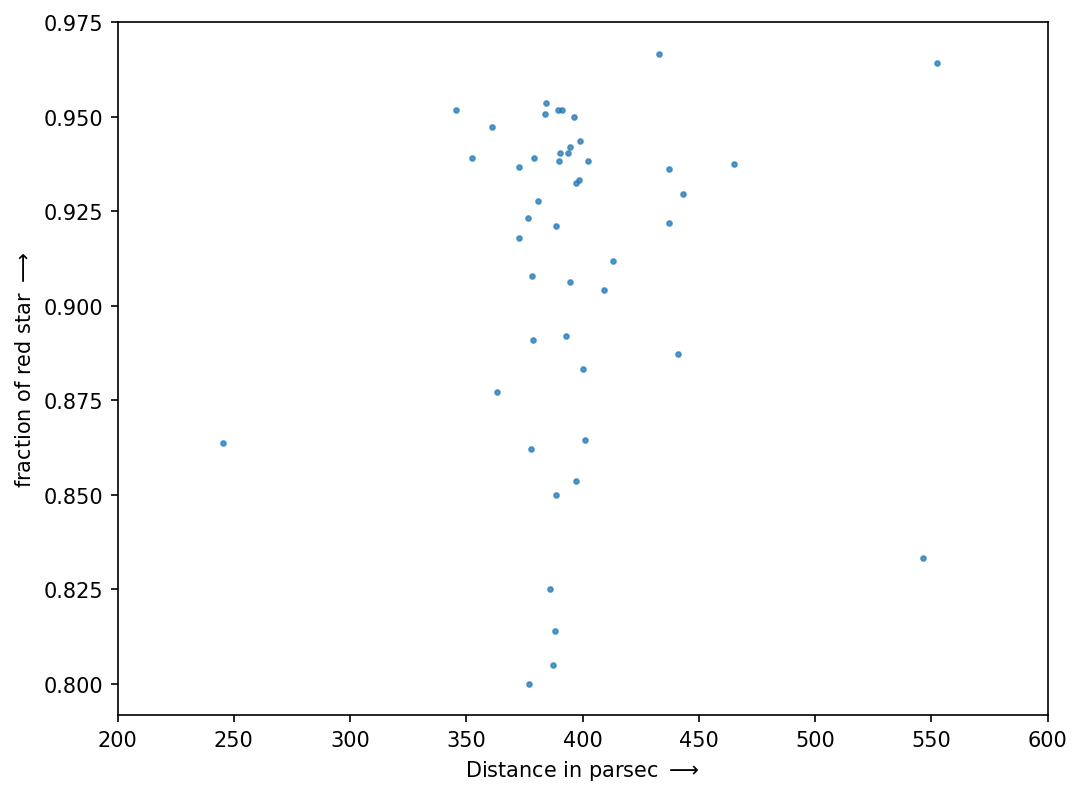

In [16]:
fig, ax = plt.subplots(dpi=150, figsize=[8, 6])
ax.scatter(orion_ttauri_list["r_med_photogeo"][0:50], orion_red_frac, s=5, alpha=0.7)
ax.set_xlim(200, 600)
ax.set_xlabel(r"Distance in parsec $\longrightarrow$")
ax.set_ylabel("fraction of red star $\longrightarrow$")
plt.show()


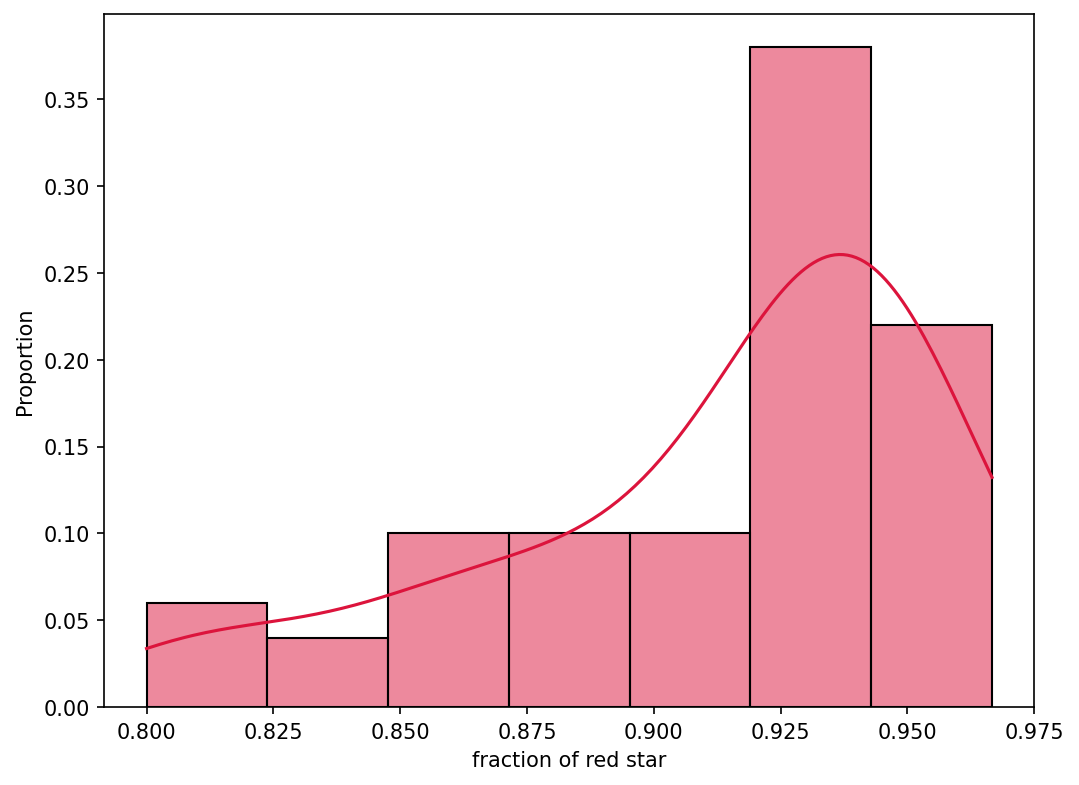

In [17]:
plt.figure(dpi=150, figsize=[8, 6])
sn.histplot(orion_red_frac, stat='proportion', color='#DC143C', kde=True)
plt.xlabel("fraction of red star")

plt.show()


### $\textbf{Unknown Nebula (Yet to verified)*}$

In [18]:
tauri2 = pd.read_csv("t tauri star set2.csv")
name2 = tauri2['SimbadName']



restricted_index2 = [2, 3, 6, 18, 53, 123, 124, 137, 138,
                     139, 140, 153, 154, 155, 156, 168, 169, 205, 213, 214, 215, 216, 226, 227, 248,
                     249, 274, 275, 305, 306, 337, 361, 362, 381, 382, 393]
tauri2_source_id = get_source_id_tauri(name2, restricted_index2)


tauri2_list = get_TTauri_list(tauri2_source_id)

tauri_result2 = get_red_frac_ttauri(tauri2_list[0:50],  6.0)
print("Avg fraction of red star = ", np.average(tauri_result2))

399it [00:00, 411.59it/s]
100%|██████████| 50/50 [01:05<00:00,  1.31s/it]

Avg fraction of red star =  0.7721063924985954


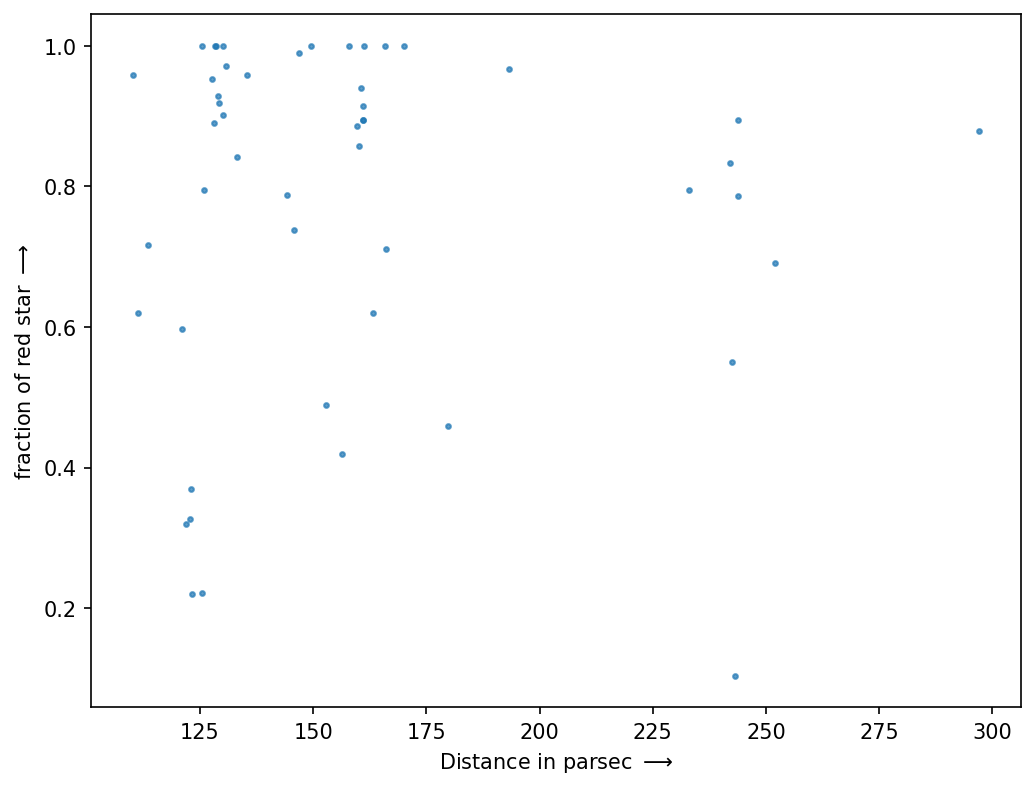

In [19]:
fig, ax = plt.subplots(dpi=150, figsize=[8, 6])
ax.scatter(tauri2_list["r_med_photogeo"][0:50], tauri_result2, s=5, alpha=0.7)
# ax.set_xlim(200, 600)
ax.set_xlabel(r"Distance in parsec $\longrightarrow$")
ax.set_ylabel("fraction of red star $\longrightarrow$")
plt.show()

### $\textbf{IC 1396 Nebula}$

In [20]:
df_ic_1396 = pd.read_csv("IC 1396-Nebula-TTauri.csv")
df_ic_1396

,recno,n_Seq,Seq,IPHAS,r'mag,e_r'mag,r'-i',e_r'-i',r'-Ha,e_r'-Ha,...,R,e_R,WHa,e_WHa,logLHa,e_logLHa,logdM/dt,e_logdM/dt,_RA,_DE
0,1,,1,J213008.57+575727.4,19.93,0.03,2.04,0.04,1.40,0.04,...,0.91,0.17,-52,7,-3.8,0.2,-9.2,0.6,322.53571,57.95761
1,2,,2,J213237.11+583241.6,17.85,0.01,1.29,0.02,1.45,0.02,...,1.13,0.10,-114,7,-2.7,0.2,-8.2,0.6,323.15462,58.54489
2,3,,3,J213317.77+574813.5,14.73,0.00,0.68,0.00,0.96,0.00,...,1.69,0.17,-81,6,-1.8,0.2,-7.4,0.6,323.32404,57.80375
3,4,,4,J213324.81+575022.9,17.33,0.00,1.01,0.01,0.96,0.01,...,0.98,0.08,-52,5,-2.9,0.2,-8.7,0.6,323.35337,57.83969
4,5,,5,J213450.88+583534.7,19.61,0.03,1.58,0.04,1.66,0.04,...,0.71,0.11,-136,11,-3.3,0.2,-8.9,0.6,323.71200,58.59297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,,154,J214808.09+574626.8,16.05,0.00,1.38,0.01,1.03,0.01,...,2.89,0.31,-37,4,-2.5,0.2,-7.5,0.6,327.03371,57.77411
154,155,,155,J214811.78+575941.6,17.01,0.01,1.33,0.01,1.16,0.01,...,1.59,0.20,-58,5,-2.7,0.2,-8.0,0.6,327.04908,57.99489
155,156,,156,J214820.52+570431.0,17.20,0.01,1.26,0.01,0.96,0.01,...,1.35,0.12,-36,4,-3.0,0.2,-8.5,0.6,327.08550,57.07528
156,157,,157,J214933.64+574502.2,16.82,0.01,1.42,0.01,1.06,0.01,...,1.99,0.29,-38,4,-2.8,0.2,-8.0,0.6,327.39017,57.75061


In [21]:
name_ic = df_ic_1396["IPHAS"]
name_ic = "IPHAS " + name_ic
name_ic

0      IPHAS J213008.57+575727.4
1      IPHAS J213237.11+583241.6
2      IPHAS J213317.77+574813.5
3      IPHAS J213324.81+575022.9
4      IPHAS J213450.88+583534.7
                 ...            
153    IPHAS J214808.09+574626.8
154    IPHAS J214811.78+575941.6
155    IPHAS J214820.52+570431.0
156    IPHAS J214933.64+574502.2
157    IPHAS J214942.69+571820.9
Name: IPHAS, Length: 158, dtype: object

In [22]:
restricted_index_ic = [21, 30, 50, 59, 62, 73, 91, 94, 111, 113, 115, 142]

ic_1396_source_id = get_source_id_tauri(name_ic, restricted_index_ic)

158it [00:00, 249.14it/s]


In [23]:
ic_1396_ttauri_list = get_TTauri_list(ic_1396_source_id)
ic_1396_ttauri_list

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
0,2175171657197521792,326.497592,56.430378,0.152497,0.055995,5816.289551,4795.274902,6641.690430,0.158728,17.004864,18.336422,15.877108,2.459314,2.921173,14.173,13.512,13.027
1,2175197564440666752,326.806298,56.824920,0.122821,0.017875,5959.578613,5405.544434,6909.128906,0.126149,14.683817,15.433267,13.811239,1.622027,0.130188,12.863,12.484,12.065
2,2175199484281510144,326.448901,56.812681,1.169108,0.107802,753.245544,724.586975,791.247437,0.044249,18.007318,19.923203,16.708952,3.214251,8.346591,14.333,13.399,12.822
3,2175230923442891776,327.085478,57.075285,0.077076,0.053247,6471.107422,5653.191406,7320.779297,0.128849,16.929178,18.187164,15.823451,2.363713,1.363783,13.967,13.269,12.776
4,2177743414900216064,323.849191,56.100041,7.509396,0.049543,132.393219,131.617233,133.138458,0.005745,16.817953,18.627577,15.536524,3.091053,11.195978,13.678,13.129,12.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2202268949464967552,327.390202,57.750584,0.152838,0.038442,5807.569824,4167.977539,7027.053711,0.246151,16.412630,17.948961,15.205171,2.743791,2.333791,13.138,12.426,11.859
134,2202283105680663424,327.033694,57.774048,0.032253,0.038155,8387.096680,7131.250977,10484.131836,0.199883,15.717817,17.101797,14.556080,2.545717,-1.739321,12.613,11.991,11.450
135,2202334336048374784,327.049060,57.994858,1.111983,0.055272,866.834473,820.687012,916.461731,0.055244,16.769297,18.005684,15.563915,2.441769,6.999788,12.920,11.657,10.844
136,2202550424445237888,326.613188,58.520245,1.107387,0.009901,882.659912,874.503845,890.286194,0.008940,13.072890,13.654689,12.333560,1.321129,3.294387,11.384,10.891,10.771


In [24]:
ic_1396_red_frac = get_red_frac_ttauri(ic_1396_ttauri_list[0:50], 6.0)

100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


In [25]:
np.average(ic_1396_red_frac)

0.8563399000394256

(array([81., 30.,  3.,  3.,  2.,  4.,  5.,  4.,  1.,  5.]),
 array([  70.92798615,  933.50073242, 1796.07348633, 2658.64624023,
        3521.21899414, 4383.79150391, 5246.36425781, 6108.93701172,
        6971.50976562, 7834.08251953, 8696.65527344]),
 <BarContainer object of 10 artists>)

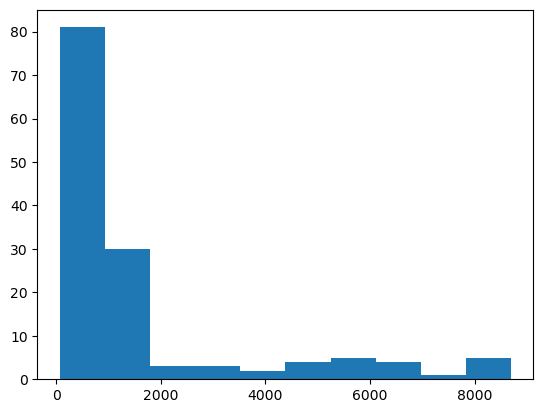

In [26]:
plt.hist(ic_1396_ttauri_list["r_med_photogeo"])

### $\textbf{NGC 2264}$

In [27]:
df_ngc_2264 = pd.read_csv("NGC 2264-Nebula-TTauri.csv")
df_ngc_2264

,recno,Sung,IPHAS,rmag,e_rmag,Hamag,e_Hamag,imag,e_imag,Jmag,...,e_logAge,logEWHa,e_logEWHa,logLHa,e_logLHa,logdMacc/dt,e_logdMacc/dt,Com,_RA,_DE
0,546,W5594,J064106.85+090216.1,15.13,0.00,14.43,0.00,14.11,0.00,12.70,...,0.17,-0.28,1.33,-4.7,1.3,NaN,NaN,,100.27854,9.03781
1,359,C36810,J064112.92+090525.7,18.35,0.01,16.93,0.01,16.97,0.01,14.51,...,0.22,1.96,0.63,-3.0,0.8,-8.4,1.2,CTTS,100.30383,9.09047
2,356,C36710,J064112.47+090851.0,18.60,0.01,17.70,0.01,16.80,0.01,14.98,...,0.10,-0.12,0.88,-5.7,0.9,NaN,NaN,,100.30196,9.14750
3,547,W5604,J064107.12+091238.3,15.36,0.00,14.62,0.00,14.52,0.00,13.07,...,0.26,0.23,1.50,-4.3,1.5,NaN,NaN,,100.27967,9.21064
4,37,C21501,J064021.51+090603.1,16.62,0.00,15.57,0.00,15.38,0.00,13.57,...,0.18,1.36,0.93,-3.4,1.0,-8.9,1.6,CTTS,100.08962,9.10086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,554,W5690,J064109.74+102136.2,16.65,0.01,15.67,0.01,14.88,0.01,13.14,...,0.08,-0.03,1.04,-4.9,1.0,NaN,NaN,,100.29058,10.36006
583,21,C19649,J064016.31+101843.7,17.37,0.00,16.32,0.01,15.79,0.00,14.06,...,0.20,0.70,1.06,-4.4,1.1,NaN,NaN,,100.06796,10.31214
584,195,C32413,J064053.53+102252.7,18.28,0.02,16.61,0.01,16.46,0.01,14.58,...,0.08,2.04,0.12,-3.5,0.2,-8.9,0.7,CTTS,100.22304,10.38131
585,512,W5078,J064051.35+102805.1,14.58,0.00,13.55,0.00,13.29,0.00,11.40,...,0.24,1.05,1.47,-2.6,1.5,NaN,NaN,,100.21396,10.46808


In [28]:
name_ngc = df_ngc_2264["IPHAS"]
name_ngc = "IPHAS " + name_ngc

In [29]:
restricted_index_ic = [23, 237, 550]

ngc_2264_source_id = get_source_id_tauri(name_ngc, restricted_index_ic)

587it [00:01, 415.89it/s]


In [30]:
ngc_2264_ttauri_list = get_TTauri_list(ngc_2264_source_id)

In [31]:
ngc_2264_ttauri_list = ngc_2264_ttauri_list[ngc_2264_ttauri_list["dist_frac"] < 0.2]
ngc_2264_ttauri_list = ngc_2264_ttauri_list.reset_index(drop=True)

In [32]:
ngc_2264_ttauri_list.iloc[4]

source_id           3.326540e+18
ra                  1.002551e+02
dec                 9.227737e+00
parallax            9.888647e-01
parallax_error      8.636693e-02
r_med_photogeo      1.003317e+03
r_lo_photogeo       9.103849e+02
r_hi_photogeo       1.099019e+03
dist_frac           9.400529e-02
phot_g_mean_mag     1.710979e+01
phot_bp_mean_mag    1.811257e+01
phot_rp_mean_mag    1.613234e+01
bp_rp               1.980232e+00
mv                  7.085469e+00
j_m                 1.466500e+01
h_m                 1.405700e+01
ks_m                1.394200e+01
Name: 4, dtype: float64

In [33]:
ngc_red_frac = get_red_frac_ttauri(ngc_2264_ttauri_list[0:50], 6.0)

100%|██████████| 50/50 [01:01<00:00,  1.23s/it]


In [34]:
np.average(ngc_red_frac)

0.7630031707176567

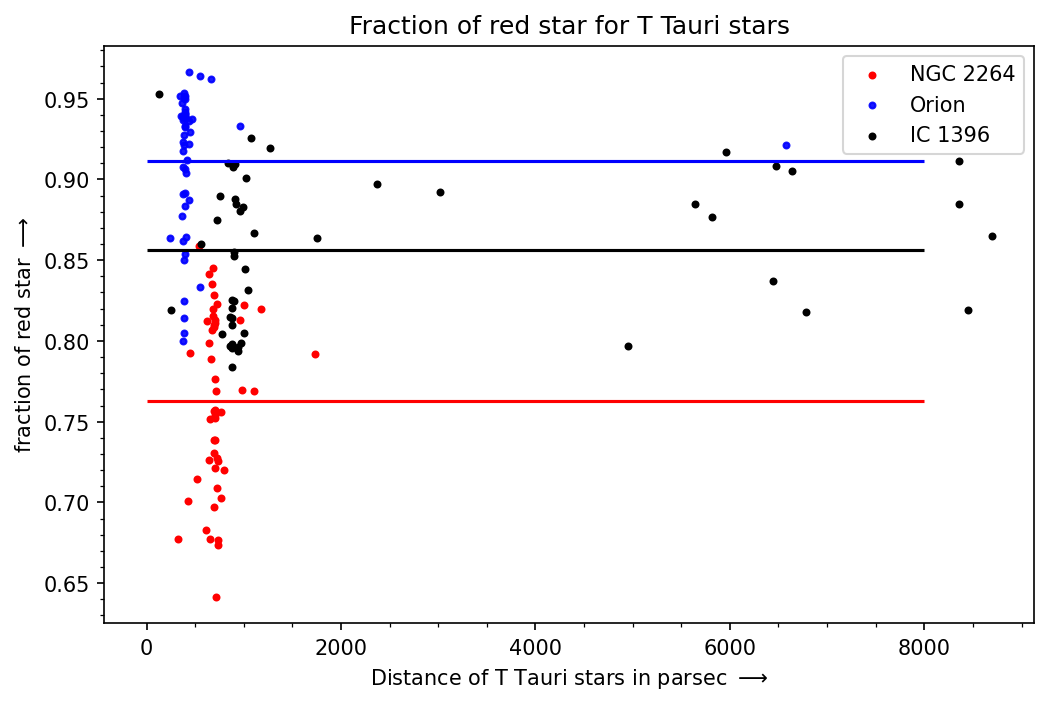

In [35]:
fig, ax = plt.subplots(dpi = 150, figsize = [8, 5])
ax.scatter(ngc_2264_ttauri_list["r_med_photogeo"][0:50], ngc_red_frac, s = 8, color = 'red', label = 'NGC 2264')
ax.scatter(orion_ttauri_list["r_med_photogeo"][0:50], orion_red_frac, s = 8, alpha = 0.9, color = 'blue', label = 'Orion')
# ax.scatter(tauri2_list["r_med_photogeo"][0:100], tauri_result2, s=5, alpha=0.7, color = 'k', label = 'Ran')
ax.scatter(ic_1396_ttauri_list["r_med_photogeo"][0:50], ic_1396_red_frac, s = 8, color = 'k', label = 'IC 1396')
ax.hlines(np.average(ngc_red_frac), 0, 8000, alpha = 1, color = 'red')
ax.hlines(np.average(orion_red_frac), 0, 8000, alpha = 1, color = 'blue')
ax.hlines(np.average(ic_1396_red_frac), 0, 8000, alpha = 1, color = 'k')
ax.legend()
ax.minorticks_on()
ax.set_ylabel(r"fraction of red star $\longrightarrow$")
ax.set_xlabel(r"Distance of T Tauri stars in parsec $\longrightarrow$")
ax.set_title("Fraction of red star for T Tauri stars")
plt.show()

## $\textbf{Different T tauri stars (not from same nebula)}$

In [36]:
df_ttauri = pd.read_csv("different_ttauri.csv")
name_diff = df_ttauri["Name"]

In [37]:
restricted_index_diff = [2, 8, 18, 19, 34,
                         36, 52, 54, 55, 58, 60, 65, 66, 68, 69]

diff_tt_sor_id = get_source_id_tauri(name_diff, restricted_index_diff)
diff_tt_sor_id


72it [00:00, 190.02it/s]


(3017245792802220544,
 147818450613367424,
 3016926045373231616,
 6237190612936085120,
 1940330572087671424,
 164832740220756608,
 145203159127518336,
 162758236656524416,
 164698634160139264,
 164507353496637952,
 152511475478780416,
 151179966897747840,
 151262700852297728,
 151374202498079872,
 2013406902311155328,
 151374198202645376,
 3314282402395528192,
 147606657186323712,
 3406081865148861440,
 158249306976130176,
 2270052256462948736,
 3209539488761714432,
 3314132593936905600,
 147790202612482560,
 147790206908395776,
 156907907082740480,
 3340856533286969600,
 3340894500797788288,
 6048501945023784704,
 6050627782031927296,
 6050951072812273664,
 3340972772281842944,
 3314312226646863488,
 3314237734735803392,
 145213187879627776,
 152226491513195648,
 144936836795636864,
 2162951684957670144,
 2162176215724606208,
 427642441904502016,
 3373611117822105472,
 2068911864187660544,
 3327886041293399424,
 2168724013630822784,
 3017250087773385344,
 4326511906643771904,
 1645511

In [38]:
diff_ttauri_list = get_TTauri_list(diff_tt_sor_id)
diff_ttauri_list

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
0,48192969034959232,65.497688,19.535056,6.890083,0.037741,144.288315,143.459091,144.981979,0.005277,9.668167,10.390567,8.757364,1.633203,3.859289,7.240,6.237,5.325
1,144936836795636864,69.824181,22.350864,6.361876,0.026396,156.490997,155.914307,157.079895,0.003724,11.591105,12.324986,10.686425,1.638560,5.609030,9.424,8.600,8.163
2,145203159127518336,68.466770,22.841617,6.237612,0.020453,160.051392,159.523300,160.667389,0.003574,12.181539,13.234386,11.105271,2.129115,6.156630,9.480,8.431,7.793
3,145213187879627776,68.969968,22.906371,5.839486,0.048997,170.130737,168.658234,171.825958,0.009310,13.033619,14.319030,11.779206,2.539824,6.865492,9.549,8.469,7.625
4,147606657186323712,68.864103,24.249605,7.776009,0.022055,128.201553,127.879684,128.474762,0.002321,11.460606,12.337834,10.505226,1.832608,5.914389,9.139,8.342,8.015
5,147790202612482560,68.391949,24.354650,7.725771,0.019811,129.233063,128.890060,129.524414,0.002454,12.607882,13.874616,11.509579,2.365037,7.047591,9.341,8.418,7.888
6,147790206908395776,68.394049,24.351535,7.743297,0.018452,128.896988,128.556839,129.184784,0.002436,11.989602,13.025188,10.890767,2.134421,6.434232,9.053,8.108,7.468
7,147818450613367424,68.730943,24.481306,7.425473,0.086785,133.261703,131.888260,135.586716,0.013877,14.422950,15.719624,13.175995,2.543629,8.776570,9.433,8.546,8.047
8,151179966897747840,66.761649,25.706119,5.667197,0.499813,180.374176,166.962845,195.134674,0.078093,11.058810,12.092067,9.988384,2.103683,4.825652,8.171,7.256,6.734
9,151262700852297728,66.769578,26.104370,7.983640,0.118210,125.169769,123.433525,126.975327,0.014148,11.876411,12.864680,10.770530,2.094151,6.387416,8.691,7.722,6.992


(array([38., 13.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 115.88375092,  377.91043091,  639.93713379,  901.96380615,
        1163.99047852, 1426.01721191, 1688.04382324, 1950.07055664,
        2212.09716797, 2474.12402344, 2736.15063477]),
 <BarContainer object of 10 artists>)

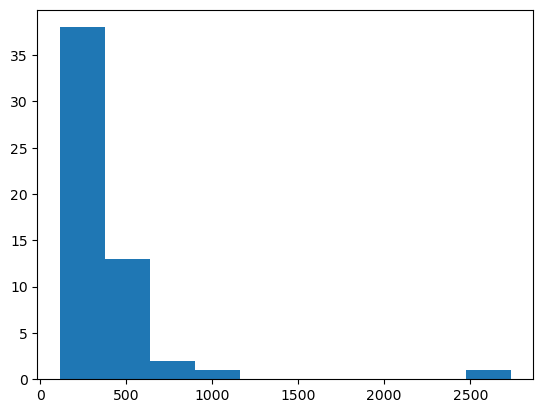

In [39]:
plt.hist(diff_ttauri_list["r_med_photogeo"])

In [40]:
diff_red_frac = get_red_frac_ttauri(diff_ttauri_list, 6.0)

100%|██████████| 55/55 [01:43<00:00,  1.88s/it]


In [41]:
np.average(diff_red_frac)

0.7892707527074989

## $\textbf{Lagoon Nebula}$

In [42]:
df_lagoon = pd.read_csv("Lagoon Nebula-TTauri.csv")
name_lagoon = df_lagoon["SimbadName"]

In [43]:
restricted_index_lagoon = [4, 6, 21, 22, 28, 33, 35, 36,
                           37, 41, 44, 47, 90, 93, 94, 95, 105, 123, 127, 138, 142, 145, 151, 176, 180, 189,
                           192, 201, 209, 210, 227, 232]
lagoon_sor_id = get_source_id_tauri(name_lagoon, restricted_index_lagoon)
lagoon_sor_id


76it [00:00, 260.14it/s]/home/priyatam/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 0 raised an error (recorded in the `errors` attribute of the result table): )
  warnings.warn("Warning: The script line number %i raised "
235it [00:00, 482.83it/s]


(4066033242666250112,
 4066033277025990528,
 4066032207556136192,
 4066039388732276352,
 4066031936996147456,
 4066031932668783232,
 4066031932668780800,
 4066039324339952256,
 4066032383672770816,
 4066038323580330496,
 4066032177514324480,
 4066039320012820224,
 4066020353446450816,
 4066038461029290624,
 4066039633577584512,
 4066038087389330048,
 4066038495389040512,
 4066020353446461952,
 4066019086446846976,
 4066039667928139264,
 4066020289044822656,
 4066038873346175104,
 4066026164550774400,
 4066019975479764608,
 4066026160242266368,
 4066038598468289024,
 4066025958392312576,
 4066041759564862464,
 4066025988443595008,
 4066041725194638592,
 4066025266889129984,
 4066026439428627072,
 4066025030688683008,
 4066025644846289664,
 4066025850995254528,
 4066022380671158784,
 4065967336368203264,
 4066027259744511488,
 4066022316269650688,
 4066027259754817536,
 4066028256187233152,
 4066027298431743232,
 4066020701361603328,
 4066134737004491392,
 4066022556787824512,
 406602701

In [44]:
lagoon_ttauri_list = get_TTauri_list(lagoon_sor_id)
lagoon_ttauri_list =  lagoon_ttauri_list[lagoon_ttauri_list["parallax_error"] < 0.3]
lagoon_ttauri_list = lagoon_ttauri_list.reset_index(drop=True)

In [45]:
type(lagoon_ttauri_list)

pandas.core.frame.DataFrame

(array([11., 19., 52., 10., 16., 13., 11.,  6.,  2.,  1.]),
 array([ 336.06109619,  728.70770264, 1121.35437012, 1514.00097656,
        1906.64758301, 2299.29418945, 2691.94091797, 3084.58740234,
        3477.23413086, 3869.88061523, 4262.52734375]),
 <BarContainer object of 10 artists>)

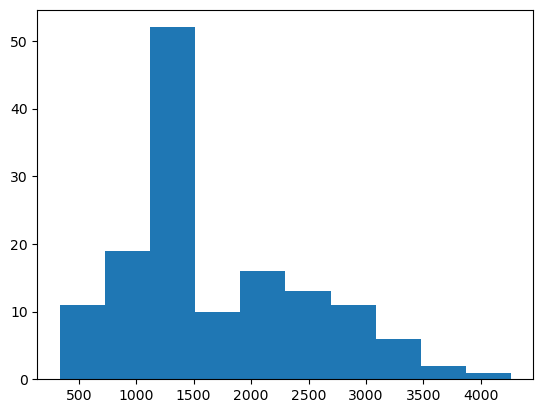

In [46]:
plt.hist(lagoon_ttauri_list["r_med_photogeo"])

In [47]:
lagoon_ttauri_list[0:20]

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
0,4065966172454732672,270.938526,-24.542667,0.367945,0.196492,2196.091309,1817.345337,2860.045654,0.237399,17.521338,18.473963,16.496527,1.977436,5.350251,14.704,14.052,13.034
1,4065966344253469696,270.900035,-24.524598,0.376389,0.161343,2510.460205,2084.681152,3457.415771,0.273403,17.636425,18.539717,16.535309,2.004408,5.514607,14.893,13.867,13.807
2,4065966374295604096,270.918960,-24.535451,0.463087,0.176324,2652.037109,1986.595947,4307.737793,0.437615,17.766649,18.725880,16.657572,2.068308,6.094962,14.788,13.947,13.288
3,4065966374295606400,270.920354,-24.527634,0.284615,0.206587,3097.930908,2290.409668,4803.504883,0.405609,17.937792,19.074266,16.817492,2.256775,5.209082,14.892,13.141,12.772
4,4065967336368203264,270.855809,-24.520084,0.817169,0.237244,2866.530273,2037.231689,3870.051025,0.319693,18.609776,20.377022,17.433086,2.943935,8.171336,15.068,14.315,14.394
5,4065968367160664448,271.101164,-24.540555,0.377702,0.270425,3780.949951,2663.623047,5362.207031,0.356866,18.731833,20.237303,17.499111,2.738192,6.617580,15.354,14.466,14.206
6,4065968504599586176,271.068429,-24.547837,0.650000,0.209342,2381.998535,1765.887451,3302.277832,0.322500,18.370295,19.710487,17.117462,2.593025,7.434863,14.920,14.133,14.442
7,4065968508916820352,271.070038,-24.541672,1.452854,0.089002,703.732544,667.067688,741.487671,0.052875,17.251829,18.145159,16.260763,1.884396,8.062939,15.042,14.381,13.985
8,4065968955593462016,271.035900,-24.532426,0.579179,0.134914,2054.782715,1633.968506,2714.379883,0.262902,17.888161,18.892502,16.734621,2.157881,6.702226,14.830,14.003,12.930
9,4065969638472069248,271.034347,-24.489418,1.166817,0.284381,2445.120117,1571.538574,3362.974609,0.366329,18.869553,20.104630,17.567415,2.537214,9.204565,15.415,14.434,14.670


In [48]:
lagoon_red_frac = get_red_frac_ttauri(lagoon_ttauri_list, 10.0)

100%|██████████| 142/142 [03:17<00:00,  1.39s/it]


In [49]:
np.average(lagoon_red_frac)

0.904509256567302

In [50]:
all_ttauri_star = pd.concat([ngc_2264_ttauri_list, orion_ttauri_list, ic_1396_ttauri_list, lagoon_ttauri_list])
all_ttauri_star

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
0,3326535183881467264,100.303809,9.090441,1.480115,0.100014,673.678711,630.015137,722.273193,0.068473,17.388887,18.579805,16.174538,2.405268,8.240365,14.507,13.667,13.270
1,3326535974155473408,100.301969,9.147472,1.403049,0.136855,724.212036,648.536804,823.349426,0.120692,17.934906,19.555862,16.709202,2.846661,8.670270,14.981,14.285,14.166
2,3326537215402297088,100.279645,9.210622,1.428569,0.031335,681.646790,667.200256,696.693298,0.021634,15.356632,16.156218,14.451838,1.704379,6.131138,13.068,12.339,11.962
3,3326537558999744128,100.089582,9.100835,1.424521,0.073401,699.576416,659.468567,736.227966,0.054861,16.582771,17.621422,15.488106,2.133316,7.351116,13.567,12.623,12.049
4,3326540234763050496,100.255101,9.227737,0.988865,0.086367,1003.317383,910.384888,1099.019165,0.094005,17.109785,18.112572,16.132339,1.980232,7.085469,14.665,14.057,13.942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,4066122023907767936,270.949632,-24.149127,0.574380,0.138874,2058.279053,1688.852539,2447.838867,0.184374,17.799227,18.588108,16.477282,2.110826,6.595225,14.671,13.685,13.089
138,4066125945223452288,271.237662,-24.120610,0.415300,0.124529,2419.667480,2031.771973,3378.889893,0.278368,17.720783,18.694981,16.690479,2.004501,5.812591,15.207,13.787,13.568
139,4066126013959231744,271.229544,-24.112427,1.648562,0.074859,595.296387,571.550659,616.738220,0.037954,17.021465,18.051014,15.990511,2.060503,8.106992,14.571,13.887,13.170
140,4066127177862892160,271.205496,-24.068017,1.151104,0.211857,974.007568,742.730652,2323.544434,0.811500,18.712336,20.023914,17.467405,2.556509,9.017909,14.838,13.501,12.835


In [51]:
all_ttauri_star = all_ttauri_star.sort_values(by="r_med_photogeo")

In [52]:
all_ttauri_star

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,dist_frac,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mv,j_m,h_m,ks_m
125,2179218753340982400,324.012926,58.033835,14.075494,0.125565,70.927986,70.392426,71.590546,0.008446,18.263716,20.011230,16.802095,3.209135,14.006034,15.105,14.796,14.679
187,3017365437719986304,83.761454,-5.329034,10.693004,0.919363,112.683220,102.751556,125.043304,0.098913,16.982027,17.627417,14.976491,2.650926,12.127526,13.215,11.714,10.712
96,3326689837064058752,100.231221,9.522495,7.925197,0.015155,125.501175,125.300812,125.698624,0.001585,13.550631,14.448711,12.617236,1.831475,8.045681,11.496,10.802,10.657
73,3326687848494733056,100.150861,9.467838,7.811030,0.128856,127.654968,125.551407,129.496445,0.015452,17.598608,19.359871,16.330193,3.029678,12.062150,14.506,13.984,13.674
4,2177743414900216064,323.849191,56.100041,7.509396,0.049543,132.393219,131.617233,133.138458,0.005745,16.817953,18.627577,15.536524,3.091053,11.195978,13.678,13.129,12.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2202283105680663424,327.033694,57.774048,0.032253,0.038155,8387.096680,7131.250977,10484.131836,0.199883,15.717817,17.101797,14.556080,2.545717,-1.739321,12.613,11.991,11.450
36,2178382467366415104,324.990403,57.395321,1.233770,0.254543,8450.974609,4910.622559,10354.385742,0.322079,19.256575,21.034498,17.910767,3.123732,9.712745,15.670,14.857,14.557
9,2178123536684577664,325.556397,56.963135,0.066033,0.032006,8696.655273,7697.283691,9767.163086,0.119004,15.897565,16.598896,15.062233,1.536663,-0.003641,13.736,13.375,12.982
61,3017262221054962944,83.666969,-5.669273,2.687973,0.275667,NaN,NaN,NaN,NaN,12.951423,NaN,NaN,NaN,5.098547,9.877,9.099,8.622


## $\textbf{Choosing the T Tauri stars which follow the same distance distribution as Herbig stars}$

### Herbig stars

In [53]:
all_herbig = pd.read_csv("all_herbig star.csv")
herbig_star_sample = all_herbig[["Name", "RAICRS", "DEICRS", "Dist", "E_Dist", "e_Dist"]]
herbig_star_sample = herbig_star_sample.sort_values(by='Dist')
herbig_star_sample = herbig_star_sample.reset_index(drop=True)

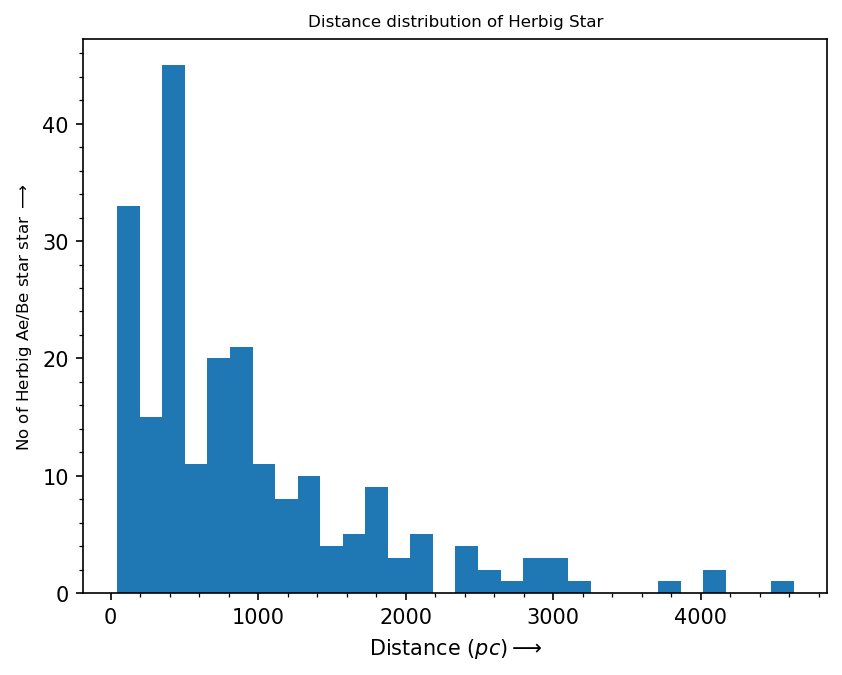

In [54]:
plt.figure(dpi=150)
plt.title("Distance distribution of Herbig Star", fontsize = 8)

#---------------------------------------------------------------------------------
#                     IMPORTING HISTOGRAM
"""   EXTRACTING INFORMATON OF HERBIG STAR DISTANCE HISTOGRAM    """

max_num_herbig, herbig_bin, patch = plt.hist(herbig_star_sample["Dist"], bins=30)

#---------------------------------------------------------------------------------
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of Herbig Ae/Be star star $\longrightarrow$", fontsize = 8)
plt.minorticks_on()
plt.show()

### Random Stars

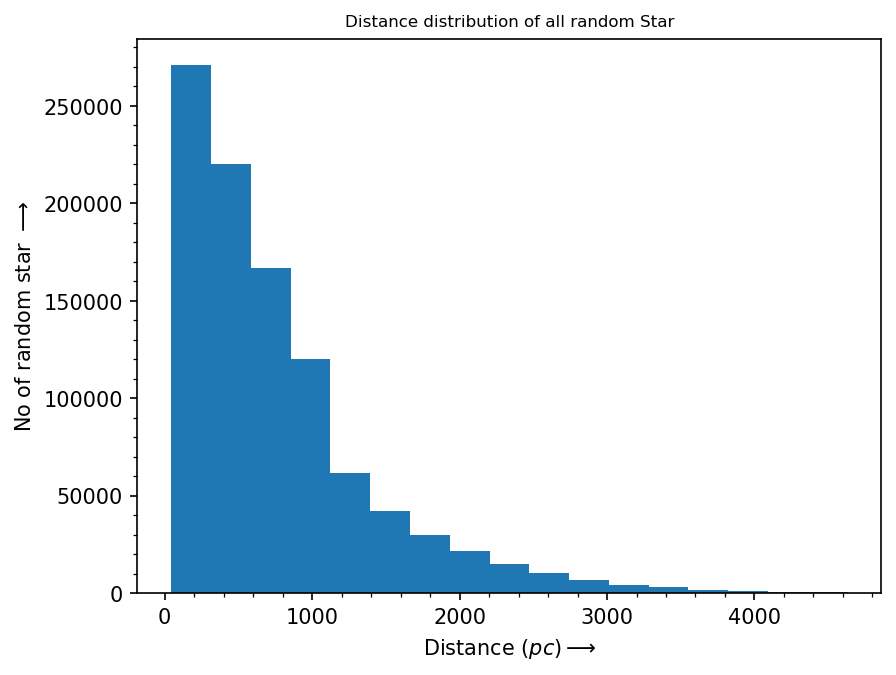

In [55]:
all_random = pd.read_csv("test_star.csv")
random_star = all_random[(all_random["parallax_error"] < 0.1)] 
random_star = random_star[(random_star["r_med_photogeo"]> min(herbig_star_sample["Dist"]))& (random_star["r_med_photogeo"] < max(herbig_star_sample["Dist"])+1 )]
random_star = random_star.reset_index(drop=True)

plt.figure(dpi=150)
plt.title("Distance distribution of all random Star", fontsize = 8)
plt.hist(random_star["r_med_photogeo"], bins = 17)
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

In [56]:
num_star = np.zeros(len(max_num_herbig))
star_bin = herbig_bin
random_star_sample = pd.DataFrame()
sum_star = 0

while sum_star < 20000:
    random_sample = random_star.sample(1, replace= False)

    for i in range(len(max_num_herbig)):
    
        if (random_sample.iloc[0]["r_med_photogeo"] >= herbig_bin[i]) & (random_sample.iloc[0]["r_med_photogeo"] < herbig_bin[i+1]):
            if num_star[i] < (max_num_herbig[i]):
                random_star_sample = pd.concat((random_star_sample, random_sample), axis=0)
                num_star[i] += 1

        
        # print(sum_star)
    if sum(num_star)== sum(max_num_herbig):
        break
    sum_star += 1

    
            

In [57]:
random_star_sample = random_star_sample.sort_values(by='r_med_photogeo')
random_star_sample = random_star_sample.reset_index(drop=True)

In [58]:
random_star_sample
herbig_star_sample

,Name,RAICRS,DEICRS,Dist,E_Dist,e_Dist
0,HD 39014,86.192917,-65.735556,44.1,1.0,0.9
1,HD 9672,23.657917,-15.676389,57.1,0.5,0.5
2,HD 199603,314.674167,-14.483333,89.3,1.4,1.3
3,HD 163296,269.088750,-21.956111,101.5,2.0,1.9
4,HD 100453,173.272917,-54.324722,104.2,0.7,0.7
...,...,...,...,...,...,...
213,MWC 657,340.674167,60.400278,3164.2,395.6,286.7
214,Hen 3-938,208.178333,-63.546944,3851.6,639.0,449.3
215,HD 305298,158.270833,-60.330833,4039.5,628.2,442.9
216,AS 470,324.059167,57.358611,4039.6,616.9,439.7


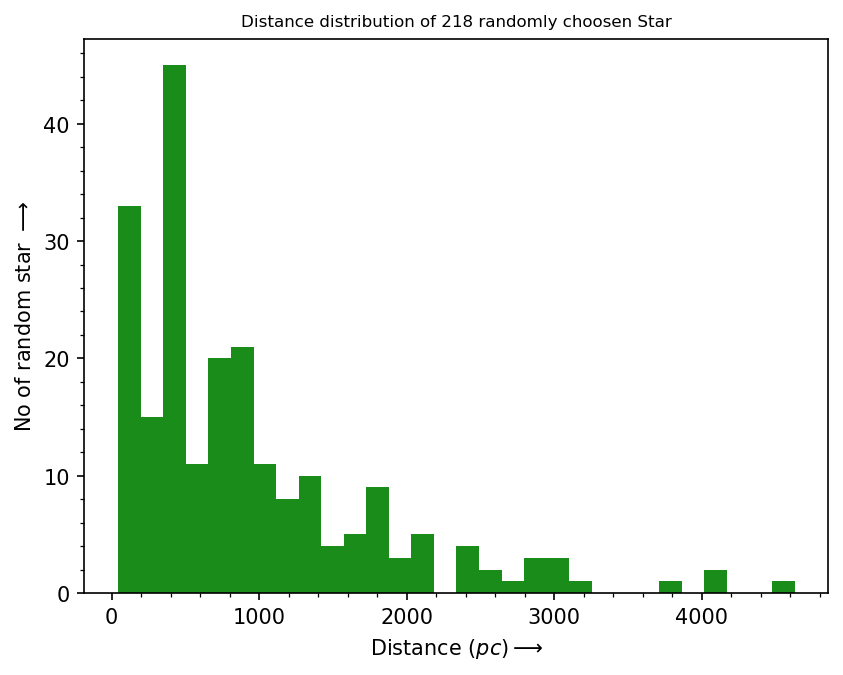

In [59]:
plt.figure(dpi=150)
plt.title("Distance distribution of 218 randomly choosen Star", fontsize = 8)
# histogram of the 218 randomly choosen star from our sample
plt.hist(random_star_sample['r_med_photogeo'], bins=herbig_bin, color = 'green', alpha = 0.9, ls = 'dotted')

# histogram of all 218 Herbig Ae/Be star
#plt.hist(herbig_star["Dist"], bins= herbig_bin, color = 'red', alpha = 0.8, ls = 'dashed')
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

### Choosig T Tauri Stars as same as Herbig, Random stars

In [60]:
num_star = np.zeros(len(max_num_herbig))
star_bin = herbig_bin
ttauri_star_sample = pd.DataFrame()
sum_star = 0

while sum_star < 10000:
    random_sample = all_ttauri_star.sample(1, replace= False)

    for i in range(len(max_num_herbig)):
    
        if (random_sample.iloc[0]["r_med_photogeo"] >= herbig_bin[i]) & (random_sample.iloc[0]["r_med_photogeo"] < herbig_bin[i+1]):
            if num_star[i] < (max_num_herbig[i]):
                ttauri_star_sample = pd.concat((ttauri_star_sample, random_sample), axis=0)
                num_star[i] += 1

        
        # print(sum_star)
    if sum(num_star)== sum(max_num_herbig):
        break
    sum_star += 1

            
            
            

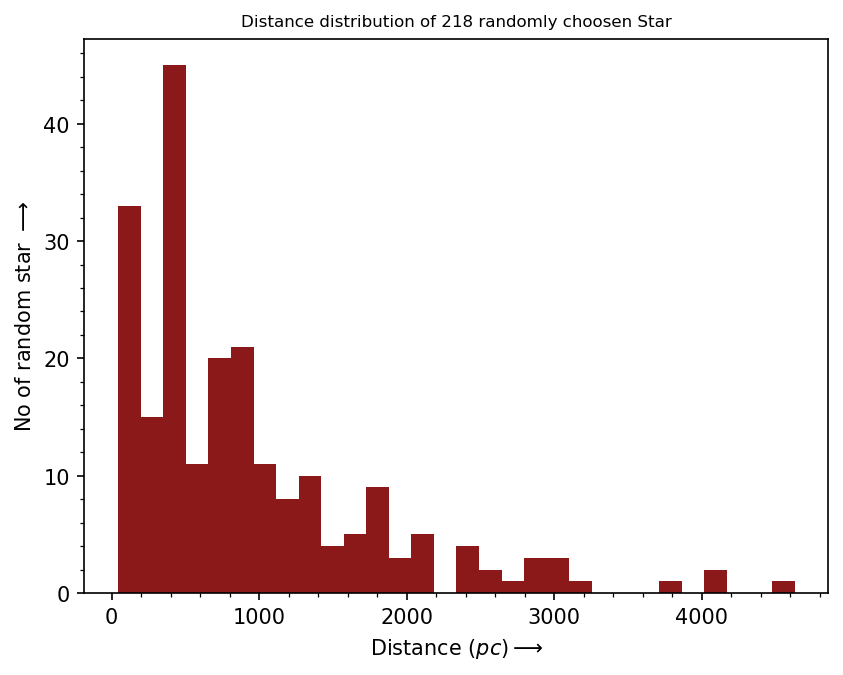

In [61]:
ttauri_star_sample = ttauri_star_sample.sort_values(by='r_med_photogeo')
ttauri_star_sample = ttauri_star_sample.reset_index(drop=True)

plt.figure(dpi=150)
plt.title("Distance distribution of 218 randomly choosen Star", fontsize = 8)
# histogram of the 218 randomly choosen star from our sample
plt.hist(ttauri_star_sample['r_med_photogeo'], bins=herbig_bin, color = 'maroon', alpha = 0.9, ls = 'dotted')

# histogram of all 218 Herbig Ae/Be star
#plt.hist(herbig_star["Dist"], bins= herbig_bin, color = 'red', alpha = 0.8, ls = 'dashed')
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

In [62]:
ttauri_sample_red_frac = get_red_frac_ttauri(ttauri_star_sample, 6.0)

100%|██████████| 218/218 [04:05<00:00,  1.13s/it]


In [63]:
np.average(ttauri_sample_red_frac)


0.8773221168826334

In [64]:
np.sqrt(np.var(ttauri_sample_red_frac))

0.06294690888107621

In [65]:
def get_red_frac_herbig_and_random(herbig_star_list, random_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_her = []   # For red object around Herbig Ae/Be star
        num_tot_star_rand = []  # For toatal star around random star
        num_red_star_rand = []  # For red objec around the Random Star

        # After  distance filter

        after_num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        after_num_red_star_her = []   # For red object around Herbig Ae/Be star
        after_num_tot_star_rand = []  # For toatal star around random star
        after_num_red_star_rand = []  # For red objec around the Random Star
        


        for i in tqdm(range(herbig_star_list.shape[0])):

            herbig_star = get_surrounding_sources(1000, herbig_star_list.loc[i][1], herbig_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
            her_mg = herbig_star["mv"]
            her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

            # Considering only those sources which lies within the 2*sigma distance error of the main source.

            sigma_herb = (herbig_star_list["e_Dist"][i] + herbig_star_list["E_Dist"][i])/2
            y1 = herbig_star_list["Dist"][i] - 2 *sigma_herb
            y2 = herbig_star_list["Dist"][i] + 2 *sigma_herb

            after_herbig = herbig_star#[herbig_star["dist_frac"] < 0.2]
            after_herbig = after_herbig[(after_herbig["r_med_photogeo"] > y1) & (after_herbig["r_med_photogeo"] < y2)]
            her_mg_af = after_herbig["mv"]
            her_gk_af = after_herbig["phot_g_mean_mag"] - after_herbig["ks_m"]


            
            #-----------------------------------------------------------------------------
            rand_star = get_surrounding_sources(1000, random_star_list.loc[i][1], random_star_list.loc[i][2], radius)
            rand_star = rand_star[rand_star["parallax_error"] < 0.3]
            rand_mg = rand_star["mv"]
            rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

            # -----------------------------------------
            sigma_star = (random_star_list["r_hi_photogeo"][i] - random_star_list["r_lo_photogeo"][i])/2
            x1 = random_star_list["r_med_photogeo"][i] - 2 *sigma_star
            x2 = random_star_list["r_med_photogeo"][i] + 2 *sigma_star
            after_star = rand_star#[rand_star["dist_frac"] < 0.2]
            after_star = after_star[(after_star["r_med_photogeo"] > x1) & (after_star["r_med_photogeo"] < x2)]
        
            rand_mg_af = after_star["mv"]
            rand_gk_af = after_star["phot_g_mean_mag"] - after_star["ks_m"]
            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a Herbig Ae/Be Star"""

            her_red_star = counting_fun(her_mg, her_gk)

            num_tot_star_her.append(len(her_mg))
            num_red_star_her.append(her_red_star)


            af_her_red = counting_fun(her_mg_af, her_gk_af)
            after_num_tot_star_her.append(len(her_mg_af))
            after_num_red_star_her.append(af_her_red)


            """ Counting Red Object around a Random Star"""
            
            rand_red_star = counting_fun(rand_mg, rand_gk)
            num_tot_star_rand.append(len(rand_mg))
            num_red_star_rand.append(rand_red_star)


            af_star_red = counting_fun(rand_mg_af, rand_gk_af)
            after_num_tot_star_rand.append(len(rand_mg_af))
            after_num_red_star_rand.append(af_star_red)


            # print("total number of red object surrounding the Herbig Star {}".format(herbig_20.loc[i][0]) + " = {}".format(num_red_stars))
            # print("Toatal surrounding stars = {}".format(len(her_mg)))


        # print("List of total stars surrounding a herbig star within 6 arcminutes = ",num_tot_star_her) 
        # print("List red stars for 20 Herbig Stars = ",num_red_star_her)
        # print("List of total stars surrounding a Random star within 6 arcminutes = ",num_tot_star_rand) 
        # print("List red stars for 20 Random stars = ",num_red_star_rand)

        return num_red_star_her, num_tot_star_her, num_red_star_rand, num_tot_star_rand, after_num_red_star_her, after_num_tot_star_her, after_num_red_star_rand, after_num_tot_star_rand
        

    
    all_list = list_red_object(search_radius/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    num_red_star_rand = all_list[2]
    num_tot_star_rand = all_list[3]
    af1 = all_list[4]
    af2 = all_list[5]
    af3 = all_list[6]
    af4 = all_list[7]


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    frac_before_herb = []
    frac_before_rand = []
    frac_after_herb = []
    frac_after_rand = []

    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_before_herb.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            frac_before_herb.append(f1)
        


        if af2[i] == 0:
            f1 = 0.0
            frac_after_herb.append(f1)
        
        else:
            f1 = af1[i]/af2[i]
            frac_after_herb.append(f1)


        # THIS IS FOR RANDOM STAR

        if num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_before_rand.append(f1)

        else:
            f1 = num_red_star_rand[i]/num_tot_star_rand[i]
            frac_before_rand.append(f1)
        


        if af4[i] == 0:
            f1 = 0.0
            frac_after_rand.append(f1)
        
        else:
            f1 = af3[i]/af4[i]
            frac_after_rand.append(f1)

    
    her_avg_frac_bf = np.average(frac_before_herb)
    her_avg_frac_af = np.average(frac_after_herb)

    rnd_avg_frac_bf = np.average(frac_before_rand)
    rnd_avg_frac_af = np.average(frac_after_rand)



    return frac_before_herb, frac_after_herb, frac_before_rand, frac_after_rand

    

In [66]:
red_fraction_herbig_random = get_red_frac_herbig_and_random(herbig_star_sample, random_star_sample, 6.0)

100%|██████████| 218/218 [19:51<00:00,  5.47s/it]


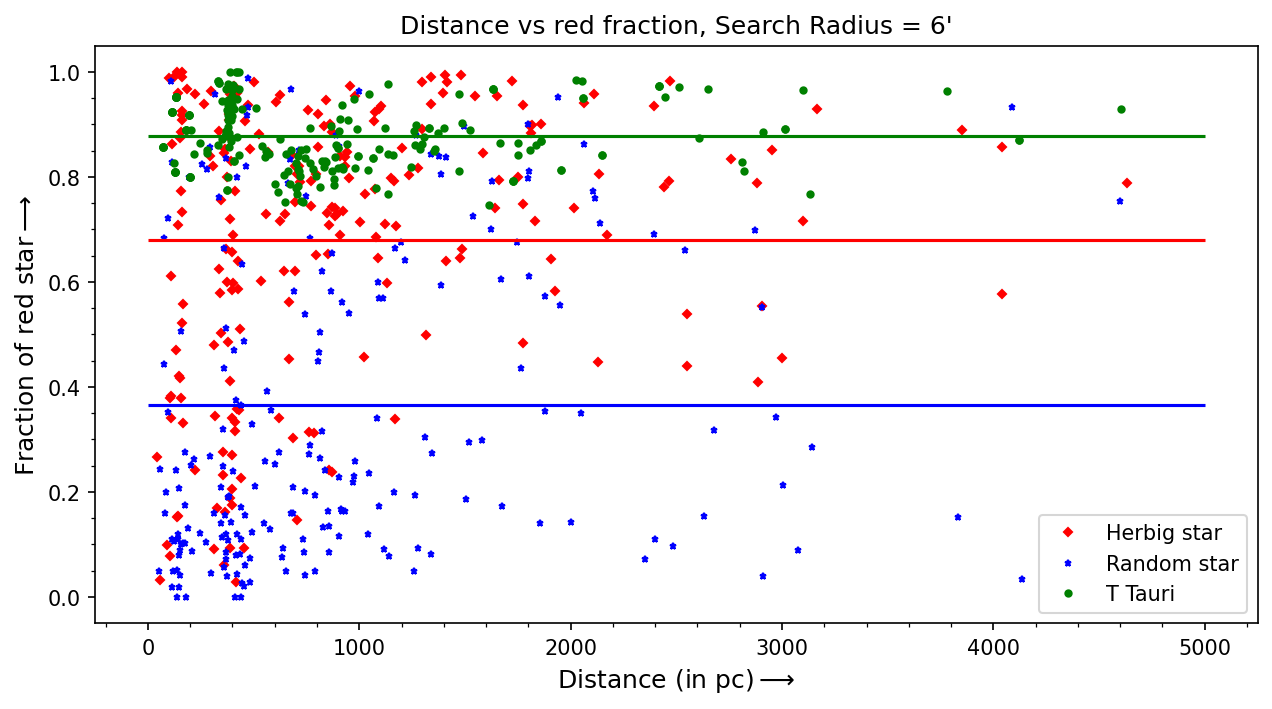

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize = (10, 5))
ax.plot(herbig_star_sample["Dist"],red_fraction_herbig_random[0], linestyle = ' ', marker = "D",markersize = 3, color = 'red', label = 'Herbig star')
ax.plot(random_star_sample["r_med_photogeo"], red_fraction_herbig_random[2], linestyle = ' ', marker = "*", markersize = 3, color = 'blue', label = 'Random star')
ax.plot(ttauri_star_sample["r_med_photogeo"], ttauri_sample_red_frac, linestyle = ' ', marker = "o", markersize = 3, color = 'green', label = 'T Tauri')
ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 12)
ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
ax.hlines(np.average(red_fraction_herbig_random[0]), xmin=0, xmax=5000, color = 'red')
ax.hlines(np.average(red_fraction_herbig_random[2]), xmin=0, xmax=5000, color = 'blue')
ax.hlines(np.average(ttauri_sample_red_frac), xmin=0, xmax=5000, color = 'green')
ax.legend(fontsize = 10)
ax.minorticks_on()
ax.set_title("Distance vs red fraction, Search Radius = 6\'", fontsize = 12)
fig.savefig("allthree.jpg", dpi=600, bbox_inches='tight')
plt.show()

In [68]:
# EXtracting data about fraction of red objects around Herbig Ae/Be star and Random star

frac_herb = red_fraction_herbig_random[0]
frac_rand = red_fraction_herbig_random[2]
bins_range = np.linspace(0.0, 1.0, 21, endpoint = True)


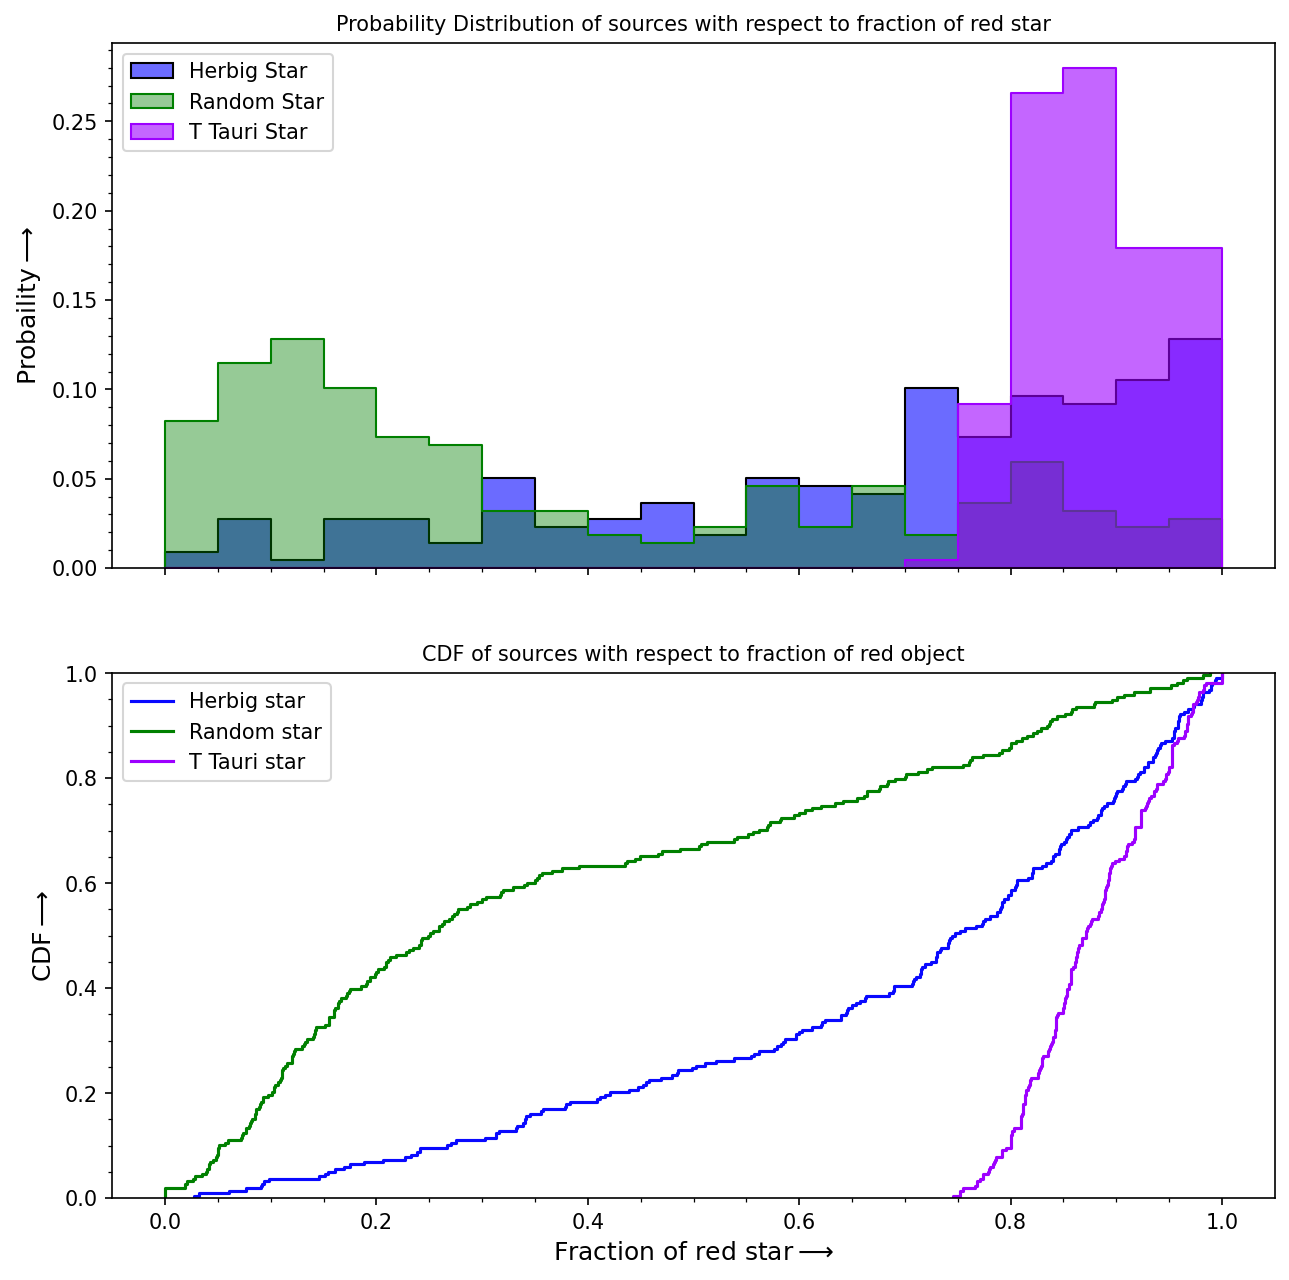

In [69]:
# fig = plt.figure(figsize=(10, 10), dpi=150)
# grid = plt.GridSpec(6, 4, wspace=0.8, hspace=0.9)
# # make subplots
# ax1 = plt.subplot(grid[0:3, 0:])
# ax2 = plt.subplot(grid[3:6, 0:])

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = [10, 10], dpi=150, sharex=True)

sn.histplot(frac_herb, bins = bins_range, stat='probability', ax=ax1, color='#0909FF', alpha = 0.6, label='Herbig Star', element='step', multiple="stack")
sn.histplot(frac_rand, bins = bins_range, stat='probability', ax=ax1, color = 'green',alpha = 0.41, label='Random Star', element = 'step')
sn.histplot(ttauri_sample_red_frac, bins = bins_range, stat='probability', ax=ax1, color = '#9D00FF',alpha = 0.6, label='T Tauri Star', element = 'step')

ax1.legend(loc = "upper left")
ax1.set_ylabel(r"Probaility$\longrightarrow$", fontsize = 12)
ax1.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
ax1.set_title("Probability Distribution of sources with respect to fraction of red star", fontsize = 10)
ax1.minorticks_on()


sn.ecdfplot(frac_herb, color = '#0909FF', label = 'Herbig star', ax=ax2)
sn.ecdfplot(frac_rand, color = 'green', label = 'Random star', ax=ax2)
sn.ecdfplot(ttauri_sample_red_frac, color = '#9D00FF', label = 'T Tauri star', ax=ax2)
ax2.legend()
ax2.set_title("CDF of sources with respect to fraction of red object", fontsize = 10)

ax2.set_ylabel(r"CDF$\longrightarrow$", fontsize = 12)
ax2.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
ax2.minorticks_on()
# fig.savefig("pdf_cdf_three.jpg", dpi = 800, bbox_inches='tight')
plt.show()

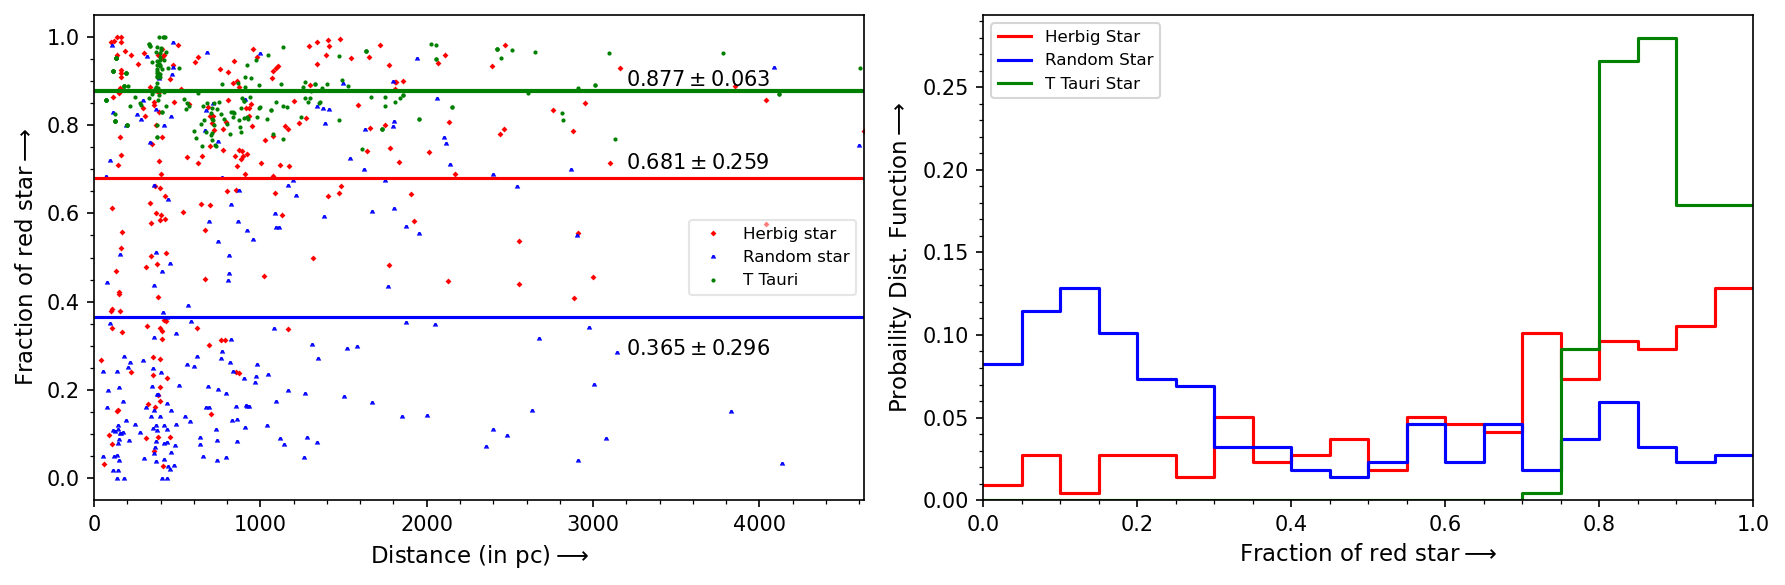

In [93]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12, 4], dpi=150)

ax1.plot(herbig_star_sample["Dist"],red_fraction_herbig_random[0], linestyle = ' ', marker = "D",markersize = 1, color = 'red', label = 'Herbig star')
ax1.plot(random_star_sample["r_med_photogeo"], red_fraction_herbig_random[2], linestyle = ' ', marker = "^", markersize = 1, color = 'blue', label = 'Random star')
ax1.plot(ttauri_star_sample["r_med_photogeo"], ttauri_sample_red_frac, linestyle = ' ', marker = "o", markersize = 1, color = 'green', label = 'T Tauri')
ax1.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 11)
ax1.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 11)
ax1.hlines(np.average(red_fraction_herbig_random[0]), xmin=0, xmax=5000, color = 'red')
ax1.hlines(np.average(red_fraction_herbig_random[2]), xmin=0, xmax=5000, color = 'blue')
ax1.hlines(np.average(ttauri_sample_red_frac), xmin=0, xmax=5000, color = 'green', linewidth = 2)
ax1.legend(fontsize = 10)
ax1.minorticks_on()
ax1.legend(loc = 'center right', fontsize = 8, fancybox=True, framealpha=0.5)

sn.histplot(frac_herb, bins = bins_range, stat='probability', ax=ax2, color = 'red', alpha = 0.99, label='Herbig Star', element='step', multiple="stack", fill=False)
sn.histplot(frac_rand, bins = bins_range, stat='probability', ax=ax2, color = 'blue', alpha = 0.99, label='Random Star', element = 'step', fill = False)
sn.histplot(ttauri_sample_red_frac, bins = bins_range, stat='probability', ax=ax2, color = 'green', alpha = 0.99, label='T Tauri Star', element = 'step', fill= False)

ax2.legend(loc = "upper left", fontsize = 8)
ax2.set_ylabel(r"Probaility Dist. Function$\longrightarrow$", fontsize = 11)
ax2.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 11)
# ax1.set_title("Fraction of the red star vs distance and the corresponding \ndistribution of sources, search radius = 6'", fontsize = 12)
ax2.set_xbound(0.0, 1.0)
ax1.set_xbound(0.0, max(herbig_star_sample["Dist"]))
ax2.minorticks_on()
ax1.text(3200, 0.89, "$%0.3f \pm %0.3f$"%(np.average(ttauri_sample_red_frac), np.sqrt(np.var(ttauri_sample_red_frac))))
ax1.text(3200, 0.7, "$%0.3f \pm %0.3f$"%(np.average(frac_herb), np.sqrt(np.var(frac_herb))))
ax1.text(3200, 0.28, "$%0.3f \pm %0.3f$"%(np.average(frac_rand), np.sqrt(np.var(frac_rand))))

fig.tight_layout()
# fig.savefig("ASI_poster.jpg", dpi = 800, bbox_inches='tight')
plt.show()

In [71]:
print("Mean red fraction T tauri = {:0.3f}, Herbig = {:0.3f} and Random = {:0.3f}".format(np.average(ttauri_sample_red_frac), np.average(frac_herb), np.average(frac_rand)))
print("Std red fraction T tauri = {:0.3f}, Herbig = {:0.3f} and Random = {:0.3f}".format(np.sqrt(np.var(ttauri_sample_red_frac)), np.sqrt(np.var(frac_herb)), np.sqrt(np.var(frac_rand))))


Mean red fraction T tauri = 0.877, Herbig = 0.681 and Random = 0.365
Std red fraction T tauri = 0.063, Herbig = 0.259 and Random = 0.296


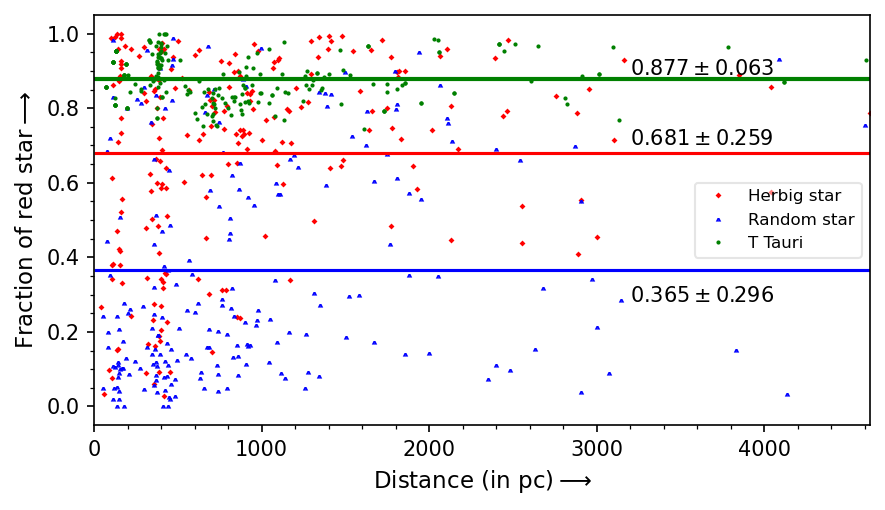

In [72]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = [6, 3.5], dpi=150)

ax1.plot(herbig_star_sample["Dist"],red_fraction_herbig_random[0], linestyle = ' ', marker = "D",markersize = 1, color = 'red', label = 'Herbig star')
ax1.plot(random_star_sample["r_med_photogeo"], red_fraction_herbig_random[2], linestyle = ' ', marker = "^", markersize = 1, color = 'blue', label = 'Random star')
ax1.plot(ttauri_star_sample["r_med_photogeo"], ttauri_sample_red_frac, linestyle = ' ', marker = "o", markersize = 1, color = 'green', label = 'T Tauri')
ax1.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 11)
ax1.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 11)
ax1.hlines(np.average(red_fraction_herbig_random[0]), xmin=0, xmax=5000, color = 'red')
ax1.hlines(np.average(red_fraction_herbig_random[2]), xmin=0, xmax=5000, color = 'blue')
ax1.hlines(np.average(ttauri_sample_red_frac), xmin=0, xmax=5000, color = 'green', linewidth = 2)
ax1.legend(fontsize = 10)
ax1.minorticks_on()
ax1.legend(loc = 'center right', fontsize = 8, fancybox=True, framealpha=0.5)


# ax1.set_title("Fraction of the red star vs distance and the corresponding \ndistribution of sources, search radius = 6'", fontsize = 12)

ax1.set_xbound(0.0, max(herbig_star_sample["Dist"]))

ax1.text(3200, 0.89, "$%0.3f \pm %0.3f$"%(np.average(ttauri_sample_red_frac), np.sqrt(np.var(ttauri_sample_red_frac))))
ax1.text(3200, 0.7, "$%0.3f \pm %0.3f$"%(np.average(frac_herb), np.sqrt(np.var(frac_herb))))
ax1.text(3200, 0.28, "$%0.3f \pm %0.3f$"%(np.average(frac_rand), np.sqrt(np.var(frac_rand))))

fig.tight_layout()
# fig.savefig("red_fraction_all.jpg", dpi = 800, bbox_inches='tight')
plt.show()

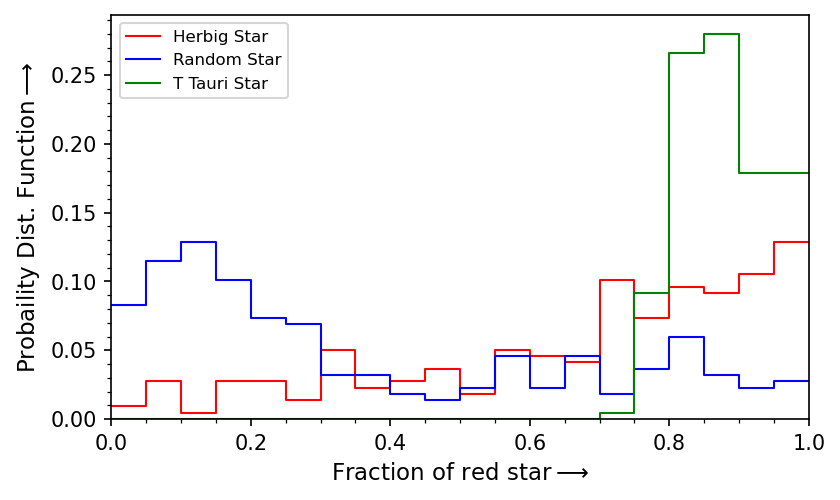

In [73]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize = [6, 3.5], dpi=150)


sn.histplot(frac_herb, bins = bins_range, stat='probability', ax=ax2, color = 'red', alpha = 0.99, label='Herbig Star', element='step', multiple="stack", fill=False, linewidth = 1)
sn.histplot(frac_rand, bins = bins_range, stat='probability', ax=ax2, color = 'blue', alpha = 0.99, label='Random Star', element = 'step', fill = False, linewidth = 1)
sn.histplot(ttauri_sample_red_frac, bins = bins_range, stat='probability', ax=ax2, color = 'green', alpha = 0.99, label='T Tauri Star', element = 'step', fill= False, linewidth = 1)

ax2.legend(loc = "upper left", fontsize = 8)
ax2.set_ylabel(r"Probaility Dist. Function$\longrightarrow$", fontsize = 11)
ax2.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 11)
ax2.set_xbound(0.0, 1.0)
ax2.minorticks_on()
# fig.savefig("pdf_all.jpg", dpi = 800, bbox_inches='tight')
plt.show()

## $\textbf{Location of these T Tauri, Herbig Ae/Be and Random Stars in the Galactic Plan}$

We have list of all these stars. I would like to see the actual location of these objects in the Galactic Plane.

In [74]:
# herbig_star_sample, random_star_sample, ttauri_star_sample

random_coord = SkyCoord(random_star_sample.ra, random_star_sample.dec, unit = (u.deg, u.deg))
herbig_coord= SkyCoord(herbig_star_sample.RAICRS, herbig_star_sample.DEICRS, unit = (u.deg, u.deg))
ttauri_coord = SkyCoord(ttauri_star_sample.ra, ttauri_star_sample.dec, unit = (u.deg, u.deg))

# Converting to galactic coordinate in degrees

random_gal = random_coord.transform_to('galactic')
herbig_gal = herbig_coord.transform_to('galactic')
ttauri_gal = ttauri_coord.transform_to('galactic')


l_random = random_gal.l.radian
l_random[l_random > np.pi] -= 2.0*np.pi
b_random = random_gal.b.radian


l_herbig = herbig_gal.l.radian
l_herbig[l_herbig > np.pi] -= 2.0*np.pi
b_herbig = herbig_gal.b.radian


l_ttauri = ttauri_gal.l.radian
l_ttauri[l_ttauri > np.pi] -= 2.0*np.pi
b_ttauri = ttauri_gal.b.radian



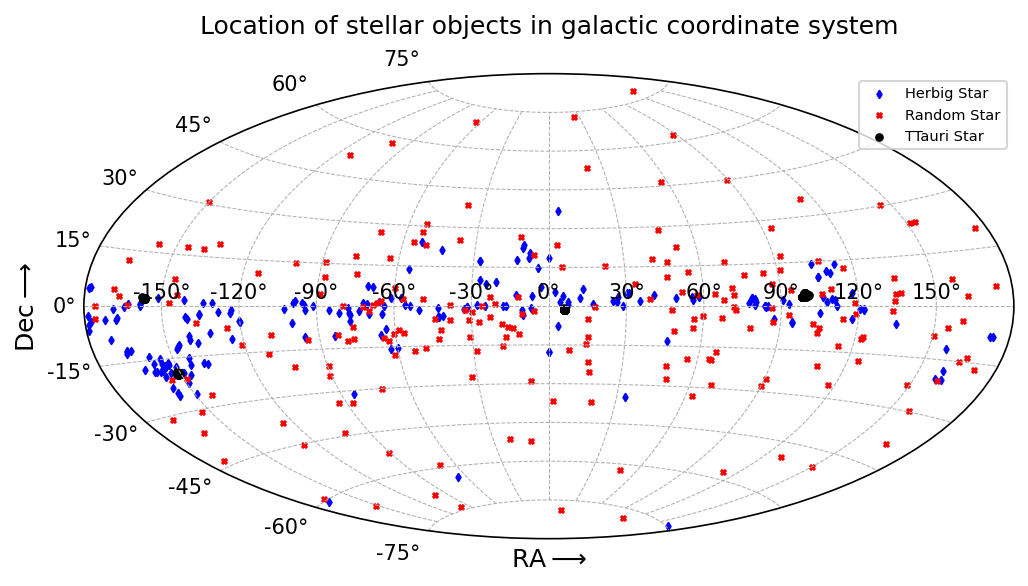

In [75]:
fig = plt.figure(figsize = [8, 5], dpi = 150)
ax = fig.add_subplot(1, 1, 1, projection='aitoff')
# ax.scatter(l_one, b_one, s = 1, color = 'orange', alpha = 0.1 )
ax.scatter(l_herbig, b_herbig, s = 6, color ='blue', marker = 'd', label = 'Herbig Star')
ax.scatter(l_random, b_random, s = 6, color = 'red', marker = "x", label = 'Random Star')

ax.scatter(l_ttauri, b_ttauri, s = 10, color = 'black', marker = "o", label = 'TTauri Star')

ax.legend(fontsize = 7)
ax.minorticks_on()
ax.grid(True, linewidth = 0.5, linestyle = '--')
ax.set_xlabel(r'$\mathrm{RA}\longrightarrow$')
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel(r'$\mathrm{Dec}\longrightarrow$')
ax.yaxis.label.set_fontsize(12)
ax.set_title("Location of stellar objects in galactic coordinate system\n")
plt.savefig('galactic position.jpg', dpi = 500, bbox_inches='tight')
plt.show()


In [76]:
# Defining a function which will return GAIA's and 2MASS's data of T Tauri sources taking input of source_id of the sources

def get_candidates_details(s_id):
    """Pass a tuple of source id of sources, it will return all required parameters values from the GAIA DR3, 2MASS"""

    query = """SELECT g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_photogeo, g.phot_g_mean_mag, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv_g_para,
        g.phot_g_mean_mag + 5 - 5*log10(d3.r_med_photogeo) AS mv_G_dist, tt.j_m, tt.j_m + 5*log10(g.parallax) - 10 AS mv_j_para, tt.j_m + 5 - 5*log10(d3.r_med_photogeo) AS mv_J_dist
        FROM gaiadr3.gaia_source as g, gaiadr3.tmass_psc_xsc_best_neighbour as t, tmass_original_valid as tt, external.gaiaedr3_distance AS d3
        WHERE g.source_id IN {}""".format(s_id) + """ AND g.parallax > 0.0 AND
        (g.parallax IS NOT NULL) AND (g.phot_g_mean_mag IS NOT NULL) AND (g.source_id = t.source_id AND t.clean_tmass_psc_xsc_oid = tt.tmass_oid) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()
    result = result.to_pandas()

    return result


# $\textbf{Candidates Verification}$

In [77]:
candidates_id = (5217319670373346560, 3496509309189181184, 6161088224851872256, 6297846030869107072, 125713490892555776, 285917072406353408, 1304434069476414336, 5282908184679640576, 6293384448905844224)

In [78]:
candidate_list = get_candidates_details(candidates_id)

In [79]:
candidate_list = candidate_list.sort_values(by = 'r_med_photogeo')
candidate_list = candidate_list.reset_index(drop=True)

In [80]:
candidate_list

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,phot_g_mean_mag,mv_g_para,mv_g_dist,j_m,mv_j_para,mv_j_dist
0,5217319670373346560,135.888339,-73.321144,10.047650,0.040811,98.998711,16.643486,11.653809,11.665338,16.232000,11.242323,11.253853
1,6161088224851872256,202.892986,-40.625178,9.063186,0.050717,109.631805,15.772358,10.558762,10.572675,12.976000,7.762404,7.776317
2,3496509309189181184,191.303924,-26.867577,6.934053,0.059380,143.109177,15.996161,10.201097,10.217824,12.491000,6.695936,6.712663
3,6297846030869107072,213.580356,-16.068924,5.070656,0.061636,195.359695,16.501242,10.026563,10.047067,13.748000,7.273321,7.293825
4,1304434069476414336,248.559451,26.574000,4.611774,0.159739,216.087097,17.150099,10.469439,10.476955,15.393000,8.712340,8.719855
5,125713490892555776,51.309143,34.175418,4.168690,0.146858,239.103516,17.613688,10.713685,10.720758,15.288000,8.387998,8.395070
6,5282908184679640576,95.297152,-68.068705,3.985715,0.058373,248.244537,17.224695,10.227226,10.250297,16.292999,9.295530,9.318601
7,6293384448905844224,205.805214,-18.399392,4.220339,0.501745,273.985016,11.922023,5.048759,4.733389,16.188999,9.315736,9.000365
8,285917072406353408,78.536825,62.533612,3.416720,0.021141,290.011078,14.175546,6.843592,6.863473,15.095000,7.763047,7.782927


In [81]:
candidates_id

(5217319670373346560,
 3496509309189181184,
 6161088224851872256,
 6297846030869107072,
 125713490892555776,
 285917072406353408,
 1304434069476414336,
 5282908184679640576,
 6293384448905844224)

In [82]:
candidate_list.to_csv('Candidate_verification.csv')

In [83]:
red_fraction = get_red_frac_ttauri(candidate_list, 10.0)

100%|██████████| 9/9 [00:33<00:00,  3.70s/it]


In [84]:
red_fraction

[0.18953068592057762,
 0.16532258064516128,
 0.12149532710280374,
 0.06989247311827956,
 0.05263157894736842,
 0.24233128834355827,
 0.2372448979591837,
 0.10227272727272728,
 0.33206831119544594]

In [85]:
candidate_list["Red frac_10"] = red_fraction

In [86]:
candidate_list

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,phot_g_mean_mag,mv_g_para,mv_g_dist,j_m,mv_j_para,mv_j_dist,Red frac_10
0,5217319670373346560,135.888339,-73.321144,10.047650,0.040811,98.998711,16.643486,11.653809,11.665338,16.232000,11.242323,11.253853,0.189531
1,6161088224851872256,202.892986,-40.625178,9.063186,0.050717,109.631805,15.772358,10.558762,10.572675,12.976000,7.762404,7.776317,0.165323
2,3496509309189181184,191.303924,-26.867577,6.934053,0.059380,143.109177,15.996161,10.201097,10.217824,12.491000,6.695936,6.712663,0.121495
3,6297846030869107072,213.580356,-16.068924,5.070656,0.061636,195.359695,16.501242,10.026563,10.047067,13.748000,7.273321,7.293825,0.069892
4,1304434069476414336,248.559451,26.574000,4.611774,0.159739,216.087097,17.150099,10.469439,10.476955,15.393000,8.712340,8.719855,0.052632
5,125713490892555776,51.309143,34.175418,4.168690,0.146858,239.103516,17.613688,10.713685,10.720758,15.288000,8.387998,8.395070,0.242331
6,5282908184679640576,95.297152,-68.068705,3.985715,0.058373,248.244537,17.224695,10.227226,10.250297,16.292999,9.295530,9.318601,0.237245
7,6293384448905844224,205.805214,-18.399392,4.220339,0.501745,273.985016,11.922023,5.048759,4.733389,16.188999,9.315736,9.000365,0.102273
8,285917072406353408,78.536825,62.533612,3.416720,0.021141,290.011078,14.175546,6.843592,6.863473,15.095000,7.763047,7.782927,0.332068


In [87]:
red_fraction = get_red_frac_ttauri(candidate_list, 6.0)
candidate_list["Red frac_6"] = red_fraction

100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


In [88]:
candidate_list

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,phot_g_mean_mag,mv_g_para,mv_g_dist,j_m,mv_j_para,mv_j_dist,Red frac_10,Red frac_6
0,5217319670373346560,135.888339,-73.321144,10.047650,0.040811,98.998711,16.643486,11.653809,11.665338,16.232000,11.242323,11.253853,0.189531,0.262626
1,6161088224851872256,202.892986,-40.625178,9.063186,0.050717,109.631805,15.772358,10.558762,10.572675,12.976000,7.762404,7.776317,0.165323,0.141304
2,3496509309189181184,191.303924,-26.867577,6.934053,0.059380,143.109177,15.996161,10.201097,10.217824,12.491000,6.695936,6.712663,0.121495,0.129870
3,6297846030869107072,213.580356,-16.068924,5.070656,0.061636,195.359695,16.501242,10.026563,10.047067,13.748000,7.273321,7.293825,0.069892,0.130435
4,1304434069476414336,248.559451,26.574000,4.611774,0.159739,216.087097,17.150099,10.469439,10.476955,15.393000,8.712340,8.719855,0.052632,0.056338
5,125713490892555776,51.309143,34.175418,4.168690,0.146858,239.103516,17.613688,10.713685,10.720758,15.288000,8.387998,8.395070,0.242331,0.168067
6,5282908184679640576,95.297152,-68.068705,3.985715,0.058373,248.244537,17.224695,10.227226,10.250297,16.292999,9.295530,9.318601,0.237245,0.231788
7,6293384448905844224,205.805214,-18.399392,4.220339,0.501745,273.985016,11.922023,5.048759,4.733389,16.188999,9.315736,9.000365,0.102273,0.127273
8,285917072406353408,78.536825,62.533612,3.416720,0.021141,290.011078,14.175546,6.843592,6.863473,15.095000,7.763047,7.782927,0.332068,0.406250


In [89]:
candidate_list.to_csv('Candidate_verification.csv', )

In [90]:

# fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 150, figsize = (9, 6), sharex=True)
# sn.ecdfplot(frac_herb, color = 'red', label='Herbig star')
# sn.ecdfplot(frac_rand, color = 'green', label = 'Random star')
# sn.ecdfplot(ttauri_sample_red_frac, color = '#9D00FF', label = 'T Tauri star')
# ax.legend()
# ax.set_title("CDF of sources with respect to fraction of red object", fontsize = 10)

# ax.set_ylabel(r"CDF$\longrightarrow$", fontsize = 8)
# ax.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
# ax.minorticks_on()
# plt.show()

## $\textbf{Plotting red stars in the HR Diagram}$

In [91]:
y_values1 = np.linspace(1, 4.5, 50)
y_values2 = np.linspace(4.5, 8.5, 100)
y_values3 = np.linspace(8.5, 14.0, 100)


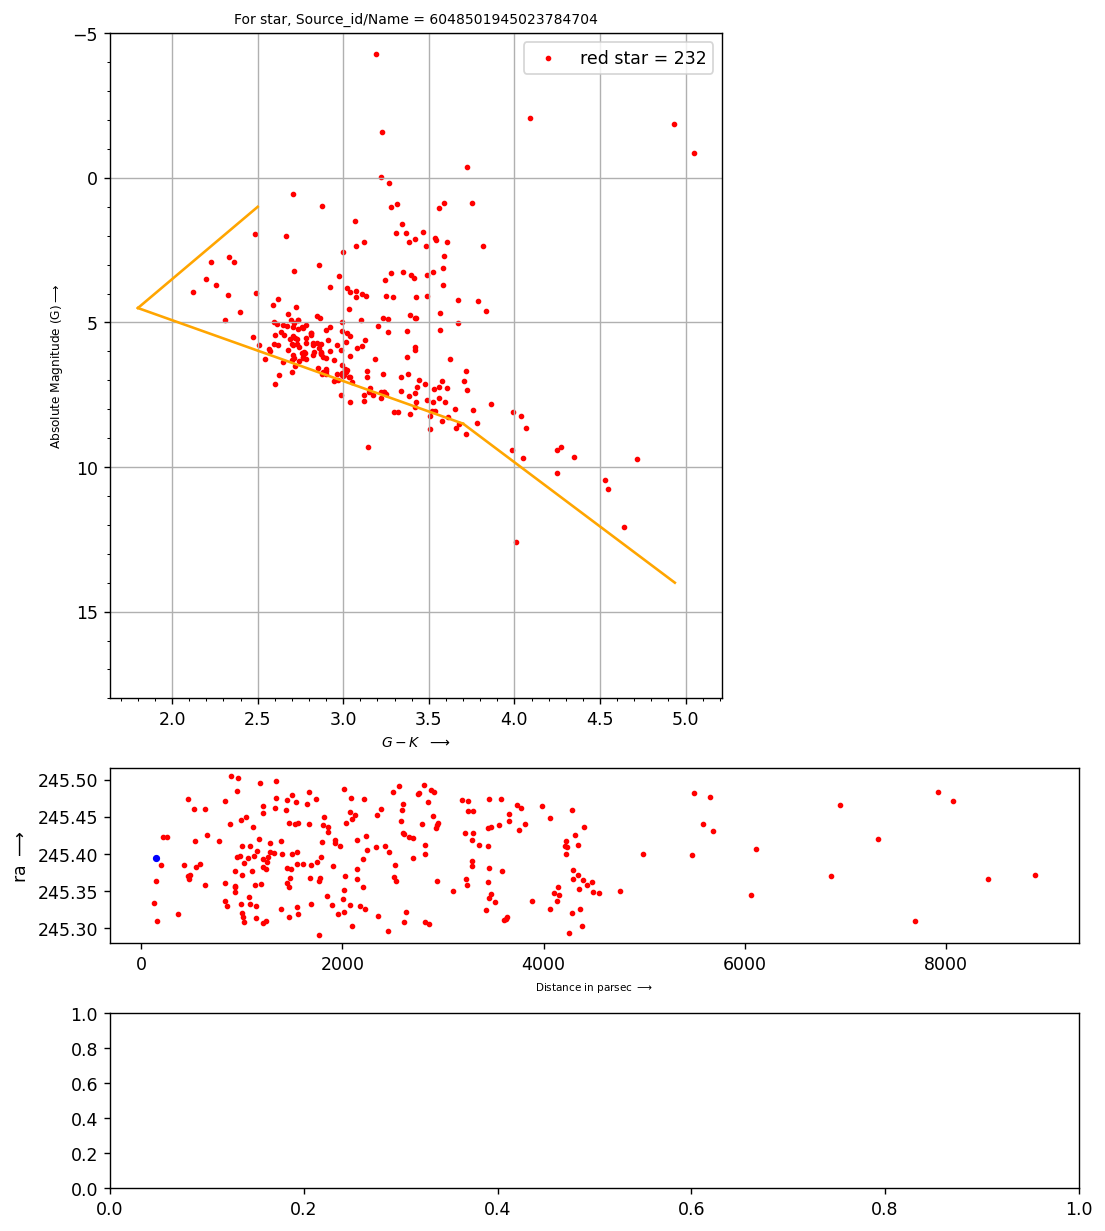

In [92]:
def plot_function(ra, dec, dist, id):

    rad = 6.0
    result = get_surrounding_sources(10000, ra, dec, rad/60.0)
    result = result[result["parallax_error"] < 0.3]

    res_gk = result["phot_g_mean_mag"] - result["ks_m"]
    res_mg = result["mv"]
    red_star = counting_fun(res_mg, res_gk)

    fig = plt.figure(figsize=(10, 12), dpi=125)
    grid = plt.GridSpec(5, 3, wspace=0.4, hspace=0.4)
    # make subplots
    ax1 = plt.subplot(grid[0:3, 0:2])
    ax2 = plt.subplot(grid[3, 0:])
    ax3 = plt.subplot(grid[4, 0:])

    ax1.set_title("For star, Source_id/Name = {}".format(id), fontsize=8)
    # ax1.scatter(gk_1m, mg, c = 'blue', s=1, alpha=0.3)
    ax1.scatter(res_gk, res_mg, c='red', s=5,
                label='red star = {}'.format(red_star))
    ax1.minorticks_on()
    ax1.grid(True)
    ax1.legend()
    ax1.set_ylim(18, -5)
    ax1.set_xlabel(r"$G - K~~\longrightarrow$", fontsize=8)
    ax1.set_ylabel(r"Absolute Magnitude (G)$\longrightarrow$", fontsize=7)
    ax1.plot(equation1(y_values1), y_values1,  color='orange')
    ax1.plot(equation2(y_values2), y_values2,  color='orange')
    ax1.plot(equation3(y_values3), y_values3, color='orange')

    ax2.scatter(result["r_med_photogeo"], result["ra"], c='red', s=5)
    ax2.scatter(dist, ra, c='blue', s=10)
    ax2.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize=6)
    ax2.set_ylabel(r"ra $\longrightarrow$")

    # Filtering out the value
    # frac = 0.2
    # result = result[result["dist_frac"] < frac]

    # res_gk = result["phot_g_mean_mag"] - result["ks_m"]
    # res_mg = result["mv"]
    # red_star = counting_fun(res_mg, res_gk)

    # ax3.set_title("Stars after filterig out distance error, dist_error < {}".format(frac), fontsize = 6)
    # ax3.scatter(result["r_med_photogeo"], result["ra"], c = 'green', s = 5, label = "No. of red star = {}".format(red_star))
    # ax3.scatter(dist, ra, c = 'blue', s = 10)
    # ax3.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 8)
    # ax3.set_ylabel(r"ra $\longrightarrow$", fontsize = 8)
    # ax3.legend()
    # ax2.minorticks_on()
    # ax3.minorticks_on()
    plt.show()


i = 50
plot_function(diff_ttauri_list["ra"][i], diff_ttauri_list["dec"][i],
              diff_ttauri_list["r_med_photogeo"][i], diff_ttauri_list["source_id"][i])
